In [1]:
#!pip install pyproj

In [2]:
#!pip install shap

In [3]:
#!pip install xgboost

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First dataset cleaning

In [5]:
import pandas as pd

df = pd.read_csv("lo_2011_2024.csv", sep=";")

# Display all column names
df.columns.tolist()

['Juhtumi nr',
 'Toimumisaeg',
 'Isikuid',
 'Hukkunuid',
 'Sõidukeid',
 'Vigastatuid',
 'Aadress',
 'Tänav',
 'Maja nr',
 'Ristuv tänav',
 'Tee nr',
 'Tee km',
 'Maakond',
 'Omavalitsus',
 'Asutusüksus',
 'Asula',
 'Liiklusõnnetuse liik',
 'Liiklusõnnetuse liik (detailne)',
 'Joobes mootorsõidukijuhi osalusel',
 'Kergliikurijuhi osalusel',
 'Jalakäija osalusel',
 'Kaassõitja osalusel',
 'Maastikusõiduki juhi osalusel',
 'Eaka (65+) mootorsõidukijuhi osalusel',
 'Bussijuhi osalusel',
 'Veoautojuhi osalusel',
 'Ühissõidukijuhi osalusel',
 'Sõiduautojuhi osalusel',
 'Mootorratturi osalusel',
 'Mopeedijuhi osalusel',
 'Jalgratturi osalusel',
 'Alaealise osalusel',
 'Esmase juhiloa omaniku osalusel',
 'Turvavarustust mitte kasutanud isiku osalusel',
 'Mootorsõidukijuhi osalusel',
 'Tüüpskeemi nr',
 'Tüüpskeem',
 'Tee tüüp',
 'Tee tüüp (detailne)',
 'Tee liik',
 'Tee element',
 'Tee element (detailne)',
 'Tee objekt',
 'Kurvilisus',
 'Tee tasasus',
 'Tee seisund',
 'Teekate',
 'Teekatte seis

In [6]:
# columns that are not needed
address_keywords = ['aadress', 'tänav', 'maja nr', 'ristuv tänav', 'tee nr',
                    'tee km', 'maakond', 'omavalitsus', 'asutusüksus',
                    'asula', 'tüüpskeemi nr', 'tüüpskeem']

# Find all columns that should be removed (case-insensitive)
notneeded_cols = [col for col in df.columns 
                  if any(k in col.lower() for k in address_keywords)]

notneeded_cols

['Aadress',
 'Tänav',
 'Maja nr',
 'Ristuv tänav',
 'Tee nr',
 'Tee km',
 'Maakond',
 'Omavalitsus',
 'Asutusüksus',
 'Asula',
 'Tüüpskeemi nr',
 'Tüüpskeem']

In [7]:
df_clean = df.drop(columns=notneeded_cols)
df_clean.head()

Juhtumi nr          Toimumisaeg  Isikuid  Hukkunuid  Sõidukeid  \
0  2302110069111  2011-03-23 19:00:00      2.0          0        1.0   
1  3100190537537  2019-09-09 18:15:00      2.0          0        2.0   
2  3120160082225  2016-09-25 14:58:00      2.0          0        2.0   
3  2402130040217  2013-05-15 13:00:00      2.0          0        2.0   
4  3130130001587  2013-06-12 01:20:00      1.0          0        1.0   

   Vigastatuid Liiklusõnnetuse liik    Liiklusõnnetuse liik (detailne)  \
0            1    Ühesõidukiõnnetus  Kokkupõrge teel oleva takistusega   
1            1           Kokkupõrge       Kokkupõrge sõidukiga küljelt   
2            1           Kokkupõrge   Kokkupõrge ees liikuva sõidukiga   
3            1           Kokkupõrge   Kokkupõrge vastutuleva sõidukiga   
4            1    Ühesõidukiõnnetus   Kokkupõrge teevälise takistusega   

   Joobes mootorsõidukijuhi osalusel  Kergliikurijuhi osalusel  ...  \
0                                0.0                       0.0  ...   
1                                0.0                       0.0  ...   
2                                0.0                       0.0  ...   
3                                0.0                       0.0  ...   
4                                0.0                       0.0  ...   

             Tee seisund   Teekate  Teekatte seisund  Sõiduradade arv  \
0  Sõidutee on ebatasane  Püsikate              Kuiv              NaN   
1     Sõidutee on korras  Püsikate              Kuiv                2   
2     Sõidutee on korras  Püsikate              Kuiv                2   
3     Sõidutee on korras  Püsikate              Kuiv              NaN   
4     Sõidutee on korras  Püsikate              Kuiv              NaN   

   Lubatud sõidukiirus       Ilmastik   Valgustus  \
0                 30.0    Selged olud   Valge aeg   
1                 70.0    Selged olud   Valge aeg   
2                 90.0    Selged olud   Valge aeg   
3                 50.0    Selged olud   Valge aeg   
4                 50.0  Pilvised olud  Pimeda aeg   

          Valgustus (detailne)  X koordinaat  Y koordinaat  
0                    Valge aeg           NaN           NaN  
1                    Valge aeg    6594053.96     565597.65  
2                    Valge aeg    6479645.27     662530.53  
3                    Valge aeg    6588149.00     734366.00  
4  Pimeda ajal valgustus põleb    6579170.00     634253.00  

[5 rows x 43 columns]

In [8]:
df_clean.columns.tolist()

['Juhtumi nr',
 'Toimumisaeg',
 'Isikuid',
 'Hukkunuid',
 'Sõidukeid',
 'Vigastatuid',
 'Liiklusõnnetuse liik',
 'Liiklusõnnetuse liik (detailne)',
 'Joobes mootorsõidukijuhi osalusel',
 'Kergliikurijuhi osalusel',
 'Jalakäija osalusel',
 'Kaassõitja osalusel',
 'Maastikusõiduki juhi osalusel',
 'Eaka (65+) mootorsõidukijuhi osalusel',
 'Bussijuhi osalusel',
 'Veoautojuhi osalusel',
 'Ühissõidukijuhi osalusel',
 'Sõiduautojuhi osalusel',
 'Mootorratturi osalusel',
 'Mopeedijuhi osalusel',
 'Jalgratturi osalusel',
 'Alaealise osalusel',
 'Esmase juhiloa omaniku osalusel',
 'Turvavarustust mitte kasutanud isiku osalusel',
 'Mootorsõidukijuhi osalusel',
 'Tee tüüp',
 'Tee tüüp (detailne)',
 'Tee liik',
 'Tee element',
 'Tee element (detailne)',
 'Tee objekt',
 'Kurvilisus',
 'Tee tasasus',
 'Tee seisund',
 'Teekate',
 'Teekatte seisund',
 'Sõiduradade arv',
 'Lubatud sõidukiirus',
 'Ilmastik',
 'Valgustus',
 'Valgustus (detailne)',
 'X koordinaat',
 'Y koordinaat']

In [9]:
rename_map = {
    "Juhtumi nr": "CaseID",
    "Toimumisaeg": "DateTime",
    "Isikuid": "Persons",
    "Hukkunuid": "Fatalities",
    "Sõidukeid": "Vehicles",
    "Vigastatuid": "Injured",

    "Liiklusõnnetuse liik": "AccidentType",
    "Liiklusõnnetuse liik (detailne)": "AccidentTypeDetailed",

    "Joobes mootorsõidukijuhi osalusel": "InvolvingIntoxicatedDriver",
    "Kergliikurijuhi osalusel": "InvolvingLightVehicleDriver",
    "Jalakäija osalusel": "InvolvingPedestrian",
    "Kaassõitja osalusel": "InvolvingPassenger",
    "Maastikusõiduki juhi osalusel": "InvolvingATVDriver",
    "Eaka (65+) mootorsõidukijuhi osalusel": "InvolvingElderlyDriver",
    "Bussijuhi osalusel": "InvolvingBusDriver",
    "Veoautojuhi osalusel": "InvolvingTruckDriver",
    "Ühissõidukijuhi osalusel": "InvolvingPublicTransportDriver",
    "Sõiduautojuhi osalusel": "InvolvingCarDriver",
    "Mootorratturi osalusel": "InvolvingMotorcyclist",
    "Mopeedijuhi osalusel": "InvolvingMopedDriver",
    "Jalgratturi osalusel": "InvolvingCyclist",
    "Alaealise osalusel": "InvolvingMinor",
    "Esmase juhiloa omaniku osalusel": "InvolvingFirstLicenseDriver",
    "Turvavarustust mitte kasutanud isiku osalusel": "InvolvingNoSafetyEquipment",
    "Mootorsõidukijuhi osalusel": "InvolvingMotorVehicleDriver",

    "Tee tüüp": "RoadType",
    "Tee tüüp (detailne)": "RoadTypeDetailed",
    "Tee liik": "RoadCategory",
    "Tee element": "RoadElement",
    "Tee element (detailne)": "RoadElementDetailed",
    "Tee objekt": "RoadObject",
    "Kurvilisus": "Curvature",
    "Tee tasasus": "RoadEvenness",
    "Tee seisund": "RoadCondition",
    "Teekate": "RoadSurface",
    "Teekatte seisund": "RoadSurfaceCondition",
    "Sõiduradade arv": "NumberOfLanes",
    "Lubatud sõidukiirus": "SpeedLimit",

    "Ilmastik": "Weather",
    "Valgustus": "Lighting",
    "Valgustus (detailne)": "LightingDetailed",

    "X koordinaat": "X_Coord",
    "Y koordinaat": "Y_Coord"
}

df_clean = df_clean.rename(columns=rename_map)

df_clean.head()

CaseID             DateTime  Persons  Fatalities  Vehicles  Injured  \
0  2302110069111  2011-03-23 19:00:00      2.0           0       1.0        1   
1  3100190537537  2019-09-09 18:15:00      2.0           0       2.0        1   
2  3120160082225  2016-09-25 14:58:00      2.0           0       2.0        1   
3  2402130040217  2013-05-15 13:00:00      2.0           0       2.0        1   
4  3130130001587  2013-06-12 01:20:00      1.0           0       1.0        1   

        AccidentType               AccidentTypeDetailed  \
0  Ühesõidukiõnnetus  Kokkupõrge teel oleva takistusega   
1         Kokkupõrge       Kokkupõrge sõidukiga küljelt   
2         Kokkupõrge   Kokkupõrge ees liikuva sõidukiga   
3         Kokkupõrge   Kokkupõrge vastutuleva sõidukiga   
4  Ühesõidukiõnnetus   Kokkupõrge teevälise takistusega   

   InvolvingIntoxicatedDriver  InvolvingLightVehicleDriver  ...  \
0                         0.0                          0.0  ...   
1                         0.0                          0.0  ...   
2                         0.0                          0.0  ...   
3                         0.0                          0.0  ...   
4                         0.0                          0.0  ...   

           RoadCondition  RoadSurface  RoadSurfaceCondition  NumberOfLanes  \
0  Sõidutee on ebatasane     Püsikate                  Kuiv            NaN   
1     Sõidutee on korras     Püsikate                  Kuiv              2   
2     Sõidutee on korras     Püsikate                  Kuiv              2   
3     Sõidutee on korras     Püsikate                  Kuiv            NaN   
4     Sõidutee on korras     Püsikate                  Kuiv            NaN   

   SpeedLimit        Weather    Lighting             LightingDetailed  \
0        30.0    Selged olud   Valge aeg                    Valge aeg   
1        70.0    Selged olud   Valge aeg                    Valge aeg   
2        90.0    Selged olud   Valge aeg                    Valge aeg   
3        50.0    Selged olud   Valge aeg                    Valge aeg   
4        50.0  Pilvised olud  Pimeda aeg  Pimeda ajal valgustus põleb   

      X_Coord    Y_Coord  
0         NaN        NaN  
1  6594053.96  565597.65  
2  6479645.27  662530.53  
3  6588149.00  734366.00  
4  6579170.00  634253.00  

[5 rows x 43 columns]

In [10]:
import pandas as pd

# eeldame, et sul on df_clean olemas

# --- 1) Lihtsad veerud: 1 väärtus -> 1 sõna --------------------

value_maps_simple = {
    "RoadSurface": {  # Teekate
        "Püsikate": "Paved",
        "Kruusatee": "Gravel",
        "Kivisillutiskate": "Cobblestone",
        "Pinnastee": "Unpaved",
    },
    "RoadSurfaceCondition": {  # Teekatte seisund
        "Kuiv": "Dry",
        "Märg": "Wet",
        "Lumelörts, soolalumine segu": "SlushSalt",
        "Sõidujäljed puhtad, sõidujälgede vahe lumine": "TracksSnow",
        "Töötlemata pinnaga jäätunud märg kate, jäide": "IcyWet",
        "Töödeldud pinnaga jäätunud kate": "IcyTreated",
        "Töödeldud pinnaga kinnisõidetud lumi": "PackedSnowTreated",
        "Töötlemata pinnaga kinnisõidetud lumi": "PackedSnow",
        "Töötlemata pinnaga jäätunud kuiv kate": "IcyDry",
        "Kohev lahtine lumi": "LooseSnow",
        "Pori, saaste": "MudDirt",
        "Muu": "Other",
        "Muu libedus - lehed, liiv, muda, õli": "OtherSlippery",
        "Lumi, jää - tavalised libeduse põhjustajad": "SnowIce",
        "Pole teada": "Unknown",
    },
    "Lighting": {
        "Valge aeg": "Day",
        "Pimeda aeg": "Dark",
        "Teadmine puudub": "Unknown",
    },
}

for col, mapping in value_maps_simple.items():
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace(mapping)

# --- 2) Mitme-väärtusega veerud: komadega loetelud -------------- 

weather_tokens = {  # Ilmastik
    "Selged olud": "Clear",
    "Pilvised olud": "Cloudy",
    "Udused olud": "Foggy",
    "Lumised olud": "Snowy",
    "Vihmasadu": "Rain",
    "Lumesadu": "Snow",
    "Lörts": "Sleet",
    "rahe": "Hail",
    "Madal vastu paistev päike": "LowSun",
    "Tuisune või tormine": "Storm",
    "Tuisk või torm": "Storm",
    "Pilvine": "Cloudy",
    "Tugev tuul": "Wind",
    "Pole teada": "Unknown",
    "Muu": "Other",
}

roadcond_tokens = {  # Tee seisund
    "Sõidutee on korras": "RoadOK",
    "Sõidutee on ebatasane": "RoadUneven",
    "Sõidutee on libe": "RoadSlippery",
    "Sõiduteel on takistus": "Obstacle",
    "Teepeenar on halvas seisukorras": "ShoulderBad",
    "Teekattemärgistus puudub": "NoMarkings",
    "Nähtavus on piiratud": "LowVisibility",
    "Puu (post) teepeenral (eraldusribal)": "TreePost",
    "Ohtliku koha tähistus puudub": "HazardUnmarked",
    "Teeremondikoha tähistus on puudulik": "WorkZoneBad",
    "Ajutine liikluskorraldus": "TempTraffic",
    "Foor ei tööta, ei ole nähtav": "SignalOff",
    "Foori ei ole": "NoSignal",
    "Liiklusmärk puudub, ei ole nähtav": "SignMissing",
    "Teadmine puudub": "Unknown",
}

def translate_multi(series, token_map):
    def _t(val):
        if pd.isna(val):
            return val
        parts = [p.strip() for p in str(val).split(",")]
        translated = [token_map.get(p, p) for p in parts]
        return ",".join(translated)
    return series.map(_t)

if "Weather" in df_clean.columns:
    df_clean["Weather"] = translate_multi(df_clean["Weather"], weather_tokens)

if "RoadCondition" in df_clean.columns:
    df_clean["RoadCondition"] = translate_multi(df_clean["RoadCondition"], roadcond_tokens)

# LightingDetailed – kui tahad ka lühendada, saab sama mustriga hiljem lisada

# --- 3) Üldine fallback: "Teadmine puudub"/"Pole teada" -> "Unknown" ----

df_clean = df_clean.replace(
    {"Teadmine puudub": "Unknown", "Pole teada": "Unknown"}
)

# --- Lisa-tõlge: AccidentType, AccidentTypeDetailed, LightingDetailed ----

accident_type_map = {
    "Ühesõidukiõnnetus": "SingleVehicle",
    "Kokkupõrge": "Collision",
    "Jalakäijaõnnetus": "PedestrianAccident",
    "Muu liiklusõnnetus": "OtherAccident",
    "Teadmata": "Unknown",
}

accident_type_detailed_map = {
    "Kokkupõrge teel oleva takistusega": "CollisionRoadObstacle",
    "Kokkupõrge sõidukiga küljelt": "CollisionSide",
    "Kokkupõrge ees liikuva sõidukiga": "CollisionRearMoving",
    "Kokkupõrge vastutuleva sõidukiga": "CollisionHeadOn",
    "Kokkupõrge teevälise takistusega": "CollisionOffRoadObstacle",
    "Kokkupõrge jalakäijaga": "CollisionPedestrian",
    "Sõidukite külgkokkupõrge": "CollisionSideVehicles",
    "Sõiduki ümberpaiskumine teel": "VehicleRollover",
    "Kukkumine ühissõidukis": "FallInPublicTransport",
    "Sõiduki teelt väljasõit": "RunOffRoad",
    "Kokkupõrge ees seisva sõidukiga": "CollisionParked",
    "Kokkupõrge loomaga": "CollisionAnimal",
    "Muu liiklusõnnetus": "OtherAccident",
    "Teadmata": "Unknown",
}

lighting_detailed_map = {
    "Valge aeg": "Day",
    "Pimeda ajal valgustus põleb": "DarkLightOn",
    "Pimeda ajal valgustus ei põle": "DarkLightsOff",
    "Pimeda ajal valgustus puudub": "DarkNoLights",
    "Teadmine puudub": "Unknown",
}

if "AccidentType" in df_clean.columns:
    df_clean["AccidentType"] = df_clean["AccidentType"].replace(accident_type_map)

if "AccidentTypeDetailed" in df_clean.columns:
    df_clean["AccidentTypeDetailed"] = df_clean["AccidentTypeDetailed"].replace(accident_type_detailed_map)

if "LightingDetailed" in df_clean.columns:
    df_clean["LightingDetailed"] = df_clean["LightingDetailed"].replace(lighting_detailed_map)

# soovi korral uuesti salvestada
# df_clean.to_csv("lo_2011_2024_clean_english.csv", sep=";", index=False)


df_clean.head()

# soovi korral salvestame uue ingliskeelsete väärtustega faili
#df_clean.to_csv("lo_2011_2024_clean_english.csv", sep=";", index=False)


CaseID             DateTime  Persons  Fatalities  Vehicles  Injured  \
0  2302110069111  2011-03-23 19:00:00      2.0           0       1.0        1   
1  3100190537537  2019-09-09 18:15:00      2.0           0       2.0        1   
2  3120160082225  2016-09-25 14:58:00      2.0           0       2.0        1   
3  2402130040217  2013-05-15 13:00:00      2.0           0       2.0        1   
4  3130130001587  2013-06-12 01:20:00      1.0           0       1.0        1   

    AccidentType      AccidentTypeDetailed  InvolvingIntoxicatedDriver  \
0  SingleVehicle     CollisionRoadObstacle                         0.0   
1      Collision             CollisionSide                         0.0   
2      Collision       CollisionRearMoving                         0.0   
3      Collision           CollisionHeadOn                         0.0   
4  SingleVehicle  CollisionOffRoadObstacle                         0.0   

   InvolvingLightVehicleDriver  ...  RoadCondition  RoadSurface  \
0                          0.0  ...     RoadUneven        Paved   
1                          0.0  ...         RoadOK        Paved   
2                          0.0  ...         RoadOK        Paved   
3                          0.0  ...         RoadOK        Paved   
4                          0.0  ...         RoadOK        Paved   

   RoadSurfaceCondition  NumberOfLanes  SpeedLimit  Weather  Lighting  \
0                   Dry            NaN        30.0    Clear       Day   
1                   Dry              2        70.0    Clear       Day   
2                   Dry              2        90.0    Clear       Day   
3                   Dry            NaN        50.0    Clear       Day   
4                   Dry            NaN        50.0   Cloudy      Dark   

   LightingDetailed     X_Coord    Y_Coord  
0               Day         NaN        NaN  
1               Day  6594053.96  565597.65  
2               Day  6479645.27  662530.53  
3               Day  6588149.00  734366.00  
4       DarkLightOn  6579170.00  634253.00  

[5 rows x 43 columns]

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20947 entries, 0 to 20946
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CaseID                          20947 non-null  object 
 1   DateTime                        20947 non-null  object 
 2   Persons                         20689 non-null  float64
 3   Fatalities                      20947 non-null  int64  
 4   Vehicles                        20689 non-null  float64
 5   Injured                         20947 non-null  int64  
 6   AccidentType                    20947 non-null  object 
 7   AccidentTypeDetailed            20947 non-null  object 
 8   InvolvingIntoxicatedDriver      20724 non-null  float64
 9   InvolvingLightVehicleDriver     20724 non-null  float64
 10  InvolvingPedestrian             20724 non-null  float64
 11  InvolvingPassenger              20724 non-null  float64
 12  InvolvingATVDriver              

In [12]:
df_clean["DateTime"] = pd.to_datetime(df_clean["DateTime"])

In [13]:
#dropping this column because too many null values
df_clean = df_clean.drop(columns=["NumberOfLanes"])

In [14]:
df_clean["Hour"] = df_clean["DateTime"].dt.hour
df_clean["Year"] = df_clean["DateTime"].dt.year
df_clean["Month"] = df_clean["DateTime"].dt.month
df_clean["Weekday"] = df_clean["DateTime"].dt.day_name()
df_clean["IsWeekend"] = df_clean["Weekday"].isin(["Saturday", "Sunday"])

In [15]:
# Remove unrealistic speed limits
df_clean = df_clean[(df_clean['SpeedLimit'] >= 10) & (df_clean['SpeedLimit'] <= 120)]

# Check again
print(df_clean['SpeedLimit'].describe())

count    19214.000000
mean        59.857968
std         21.081126
min         10.000000
25%         50.000000
50%         50.000000
75%         90.000000
max        120.000000
Name: SpeedLimit, dtype: float64


In [16]:
df_clean.describe(include='all')

CaseID                       DateTime       Persons  \
count           19214                          19214  19214.000000   
unique          19214                            NaN           NaN   
top     2302110069111                            NaN           NaN   
freq                1                            NaN           NaN   
mean              NaN  2017-12-24 09:56:41.935827968      1.934423   
min               NaN            2011-01-01 02:55:00      0.000000   
25%               NaN            2014-07-17 20:07:30      1.000000   
50%               NaN            2017-12-15 10:55:00      2.000000   
75%               NaN            2021-07-07 19:39:45      2.000000   
max               NaN            2024-11-29 02:38:00     27.000000   
std               NaN                            NaN      1.057632   

          Fatalities      Vehicles       Injured AccidentType  \
count   19214.000000  19214.000000  19214.000000        19214   
unique           NaN           NaN           NaN            5   
top              NaN           NaN           NaN    Collision   
freq             NaN           NaN           NaN         7744   
mean        0.047830      1.518997      1.204642          NaN   
min         0.000000      0.000000      0.000000          NaN   
25%         0.000000      1.000000      1.000000          NaN   
50%         0.000000      1.000000      1.000000          NaN   
75%         0.000000      2.000000      1.000000          NaN   
max         4.000000     22.000000     23.000000          NaN   
std         0.232999      0.777640      0.781738          NaN   

       AccidentTypeDetailed  InvolvingIntoxicatedDriver  \
count                 19214                19043.000000   
unique                   14                         NaN   
top     CollisionPedestrian                         NaN   
freq                   4306                         NaN   
mean                    NaN                    0.104868   
min                     NaN                    0.000000   
25%                     NaN                    0.000000   
50%                     NaN                    0.000000   
75%                     NaN                    0.000000   
max                     NaN                    1.000000   
std                     NaN                    0.306391   

        InvolvingLightVehicleDriver  ...  Weather  Lighting  LightingDetailed  \
count                  19043.000000  ...    19120     19139             19139   
unique                          NaN  ...       14         3                 5   
top                             NaN  ...    Clear       Day               Day   
freq                            NaN  ...     9789     13826             13826   
mean                       0.045108  ...      NaN       NaN               NaN   
min                        0.000000  ...      NaN       NaN               NaN   
25%                        0.000000  ...      NaN       NaN               NaN   
50%                        0.000000  ...      NaN       NaN               NaN   
75%                        0.000000  ...      NaN       NaN               NaN   
max                        1.000000  ...      NaN       NaN               NaN   
std                        0.207547  ...      NaN       NaN               NaN   

             X_Coord        Y_Coord          Hour          Year         Month  \
count   1.791300e+04   17911.000000  19214.000000  19214.000000  19214.000000   
unique           NaN            NaN           NaN           NaN           NaN   
top              NaN            NaN           NaN           NaN           NaN   
freq             NaN            NaN           NaN           NaN           NaN   
mean    6.543291e+06  579051.198355     13.797543   2017.455085      6.822838   
min     6.534730e+05  369000.000000      0.000000   2011.000000      1.000000   
25%     6.476380e+06  539256.000000     10.000000   2014.000000      5.000000   
50%     6.581952e+06  546987.730000     15.000000   2017.000000

In [17]:
# If X or Y is None, then makes both None
df_clean.loc[df_clean["X_Coord"].isna() | df_clean["Y_Coord"].isna(), ["X_Coord", "Y_Coord"]] = None

## Second dataset cleaning

In [18]:
df2 = pd.read_csv("TS093_20241202-120451.csv")

df2.head()

Indicator Traffic accidents Traffic accidents.1 Traffic accidents.2  \
0     Month   Ascending total             January            February   
1      1990              2099                 122                 119   
2      1991              1965                 149                  95   
3      1992              1167                  84                  66   
4      1993              1317                 101                  79   

  Traffic accidents.3 Traffic accidents.4 Traffic accidents.5  \
0               March               April                 May   
1                 120                 174                 198   
2                 113                 123                 156   
3                  72                  65                  98   
4                  64                 101                 123   

  Traffic accidents.6 Traffic accidents.7 Traffic accidents.8  ...  \
0                June                July              August  ...   
1                 209                 160                 200  ...   
2                 186                 220                 206  ...   
3                 115                 116                 109  ...   
4                 109                 150                 124  ...   

  Persons injured.3 Persons injured.4 Persons injured.5 Persons injured.6  \
0             March             April               May              June   
1               127               217               229               235   
2               125               117               181               226   
3                88                78               130               131   
4                84               117               142               128   

  Persons injured.7 Persons injured.8 Persons injured.9 Persons injured.10  \
0              July            August         September            October   
1               187               209               200                244   
2               260               250               246                191   
3               133               121               130                147   
4               161               146               133                135   

  Persons injured.11 Persons injured.12  
0           November           December  
1                224                215  
2                173                137  
3                 73                113  
4                121                135  

[5 rows x 79 columns]

In [19]:
df2.columns

Index(['Indicator', 'Traffic accidents', 'Traffic accidents.1',
       'Traffic accidents.2', 'Traffic accidents.3', 'Traffic accidents.4',
       'Traffic accidents.5', 'Traffic accidents.6', 'Traffic accidents.7',
       'Traffic accidents.8', 'Traffic accidents.9', 'Traffic accidents.10',
       'Traffic accidents.11', 'Traffic accidents.12',
       'Traffic accidents with fatalities',
       'Traffic accidents with fatalities.1',
       'Traffic accidents with fatalities.2',
       'Traffic accidents with fatalities.3',
       'Traffic accidents with fatalities.4',
       'Traffic accidents with fatalities.5',
       'Traffic accidents with fatalities.6',
       'Traffic accidents with fatalities.7',
       'Traffic accidents with fatalities.8',
       'Traffic accidents with fatalities.9',
       'Traffic accidents with fatalities.10',
       'Traffic accidents with fatalities.11',
       'Traffic accidents with fatalities.12',
       'Traffic accidents with the participation of d

# Data exploration and visualisation


## Year analysaition

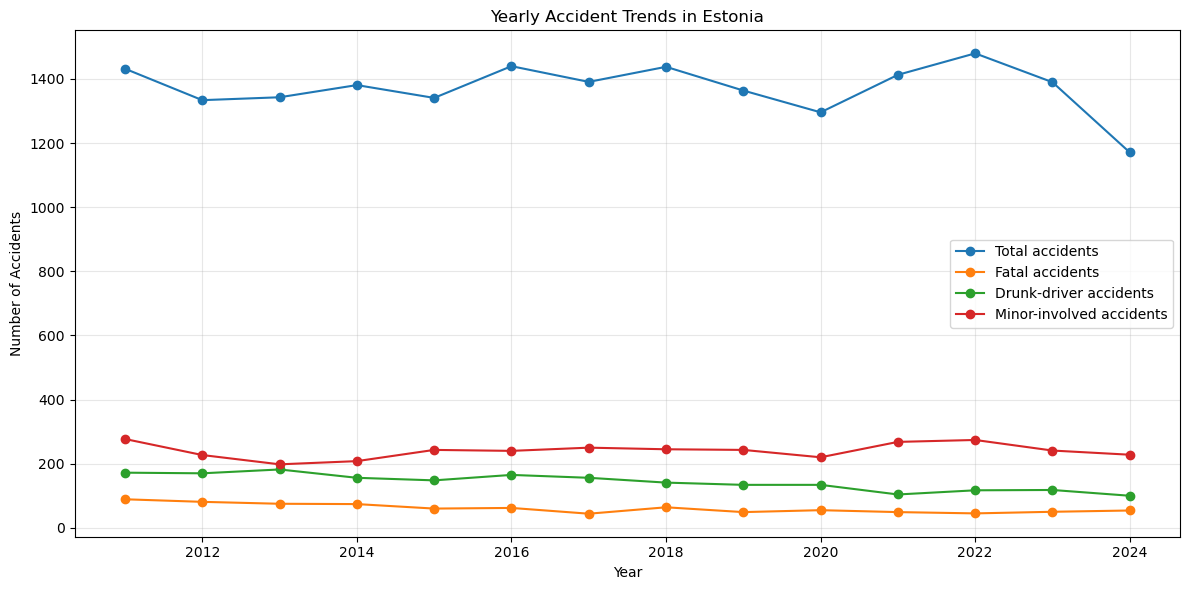

In [40]:
import matplotlib.pyplot as plt

# Prepare yearly column
df_clean["Year"] = df_clean["DateTime"].dt.year

# Main yearly trends
total = df_clean.groupby("Year").size()
fatal = df_clean[df_clean["Fatalities"] >= 1].groupby("Year").size()
drunk = df_clean[df_clean["InvolvingIntoxicatedDriver"] == 1].groupby("Year").size()
minor = df_clean[df_clean["InvolvingMinor"] == 1].groupby("Year").size()

plt.figure(figsize=(12, 6))

plt.plot(total.index, total.values, label="Total accidents", marker="o")
plt.plot(fatal.index, fatal.values, label="Fatal accidents", marker="o")
plt.plot(drunk.index, drunk.values, label="Drunk-driver accidents", marker="o")
plt.plot(minor.index, minor.values, label="Minor-involved accidents", marker="o")

plt.title("Yearly Accident Trends in Estonia")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


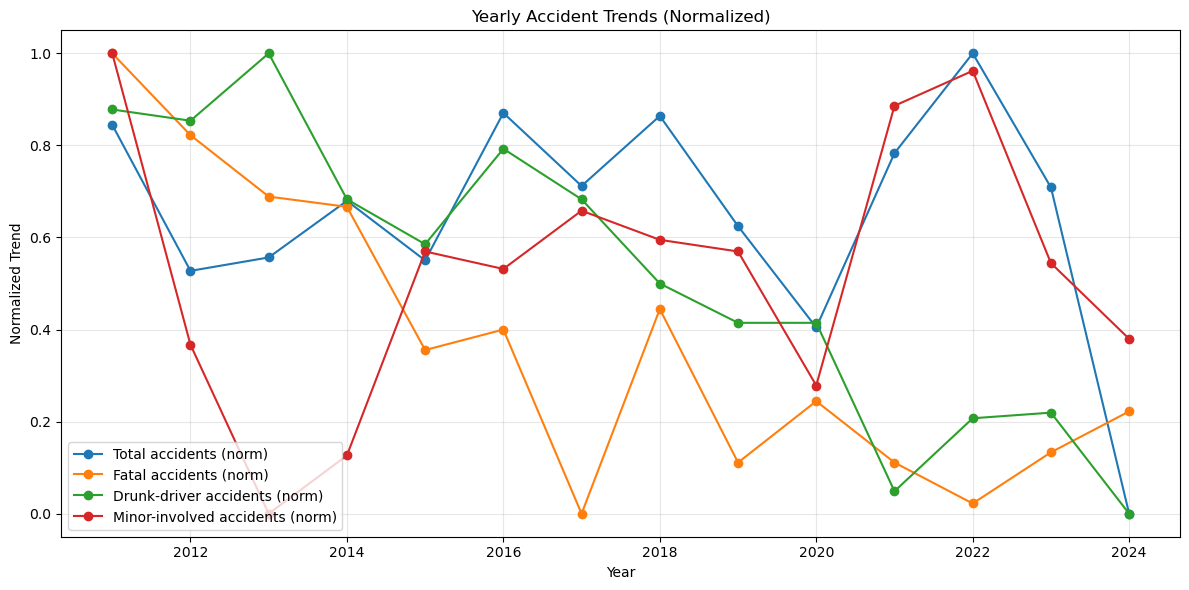

In [43]:
import matplotlib.pyplot as plt

# Normalize function 0–1
def norm(s):
    return (s - s.min()) / (s.max() - s.min())

plt.figure(figsize=(12, 6))

plt.plot(total.index, norm(total), label="Total accidents (norm)", marker="o")
plt.plot(fatal.index, norm(fatal), label="Fatal accidents (norm)", marker="o")
plt.plot(drunk.index, norm(drunk), label="Drunk-driver accidents (norm)", marker="o")
plt.plot(minor.index, norm(minor), label="Minor-involved accidents (norm)", marker="o")

plt.title("Yearly Accident Trends (Normalized)")
plt.xlabel("Year")
plt.ylabel("Normalized Trend")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## Month and season analysaition

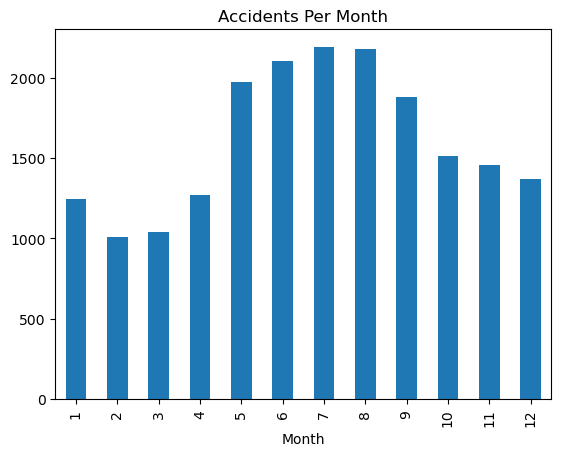

In [20]:
df_clean["Month"].value_counts().sort_index().plot(kind="bar")
plt.title("Accidents Per Month")
plt.show()

## Time analysaition

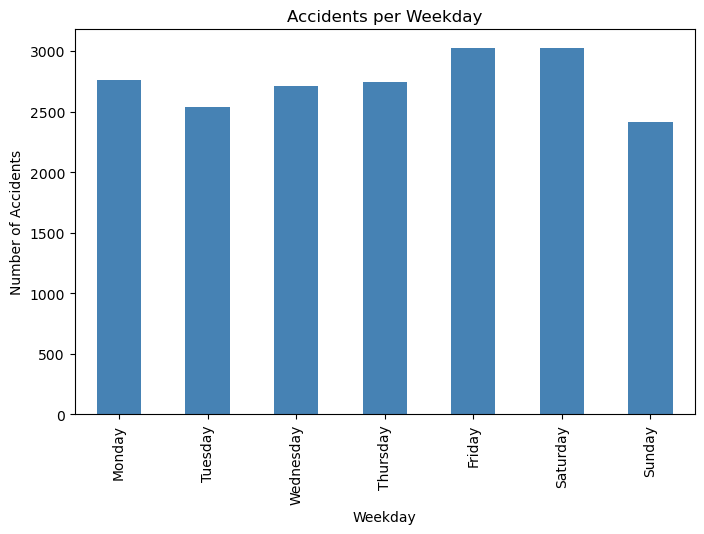

In [21]:
# Bar chart showing accidents per weekday
plt.figure(figsize=(8,5))
df_clean["Weekday"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind="bar", color="steelblue")
plt.title("Accidents per Weekday")
plt.ylabel("Number of Accidents")
plt.show()

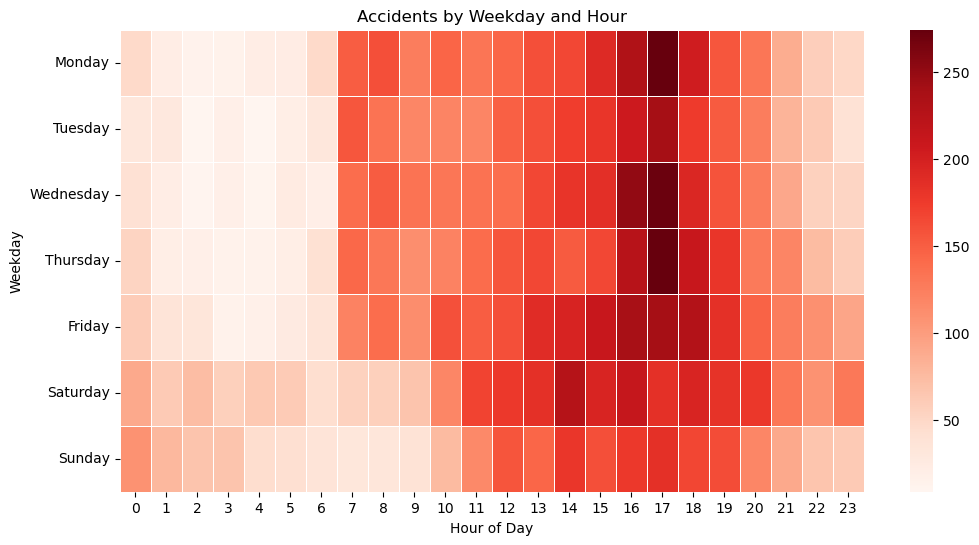

In [22]:
# Define the correct weekday order
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Pivot table: counts of accidents by weekday and hour
pivot = df_clean.pivot_table(index="Weekday", columns="Hour", values="CaseID", aggfunc="count")

# Reindex rows to follow Monday → Sunday order
pivot = pivot.reindex(weekday_order)

# Heatmap visualization
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Reds", linewidths=.5)
plt.title("Accidents by Weekday and Hour")
plt.ylabel("Weekday")
plt.xlabel("Hour of Day")
plt.show()

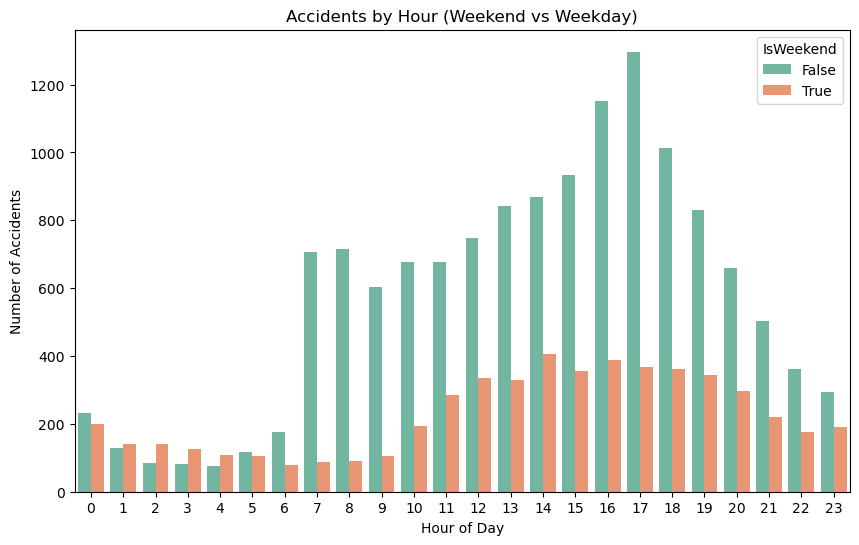

In [23]:
# Compare accident counts by hour, split into weekend vs weekday
plt.figure(figsize=(10,6))
sns.countplot(x="Hour", hue="IsWeekend", data=df_clean, palette="Set2")
plt.title("Accidents by Hour (Weekend vs Weekday)")
plt.ylabel("Number of Accidents")
plt.xlabel("Hour of Day")
plt.show()

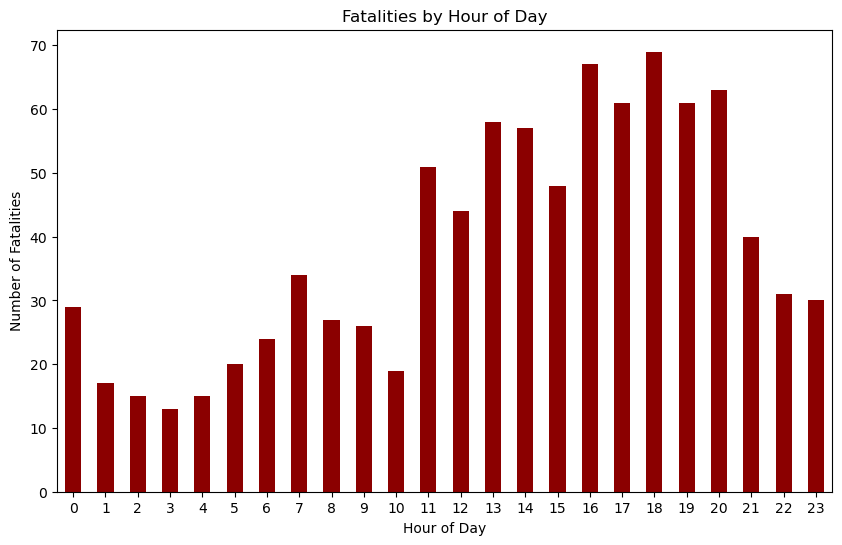

In [24]:
# Group by hour and sum fatalities
fatal_by_hour = df_clean.groupby("Hour")["Fatalities"].sum()

# Bar plot of fatalities per hour
plt.figure(figsize=(10,6))
fatal_by_hour.plot(kind="bar", color="darkred")
plt.title("Fatalities by Hour of Day")
plt.ylabel("Number of Fatalities")
plt.xlabel("Hour of Day")
plt.xticks(rotation=0)
plt.show()

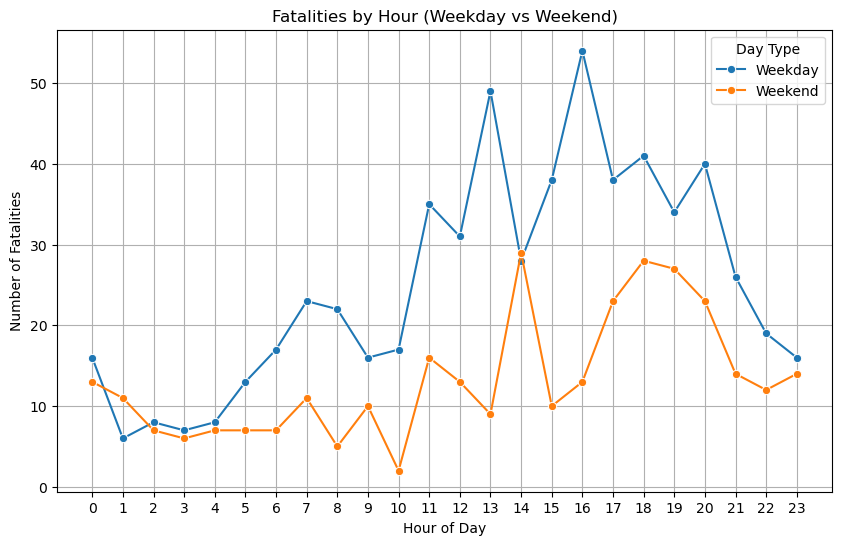

In [25]:
# Group by hour and weekend flag, summing fatalities
fatal_by_hour_weekend = df_clean.groupby(["Hour","IsWeekend"])["Fatalities"].sum().reset_index()

# Plot line chart comparing weekday vs weekend fatalities
plt.figure(figsize=(10,6))
sns.lineplot(data=fatal_by_hour_weekend, x="Hour", y="Fatalities", hue="IsWeekend", marker="o")

plt.title("Fatalities by Hour (Weekday vs Weekend)")
plt.ylabel("Number of Fatalities")
plt.xlabel("Hour of Day")
plt.xticks(range(0,24))
plt.grid(True)

# Clean up legend labels
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ["Weekday", "Weekend"]
plt.legend(handles=handles, labels=new_labels, title="Day Type")

plt.show()

## Location and road type analysaition

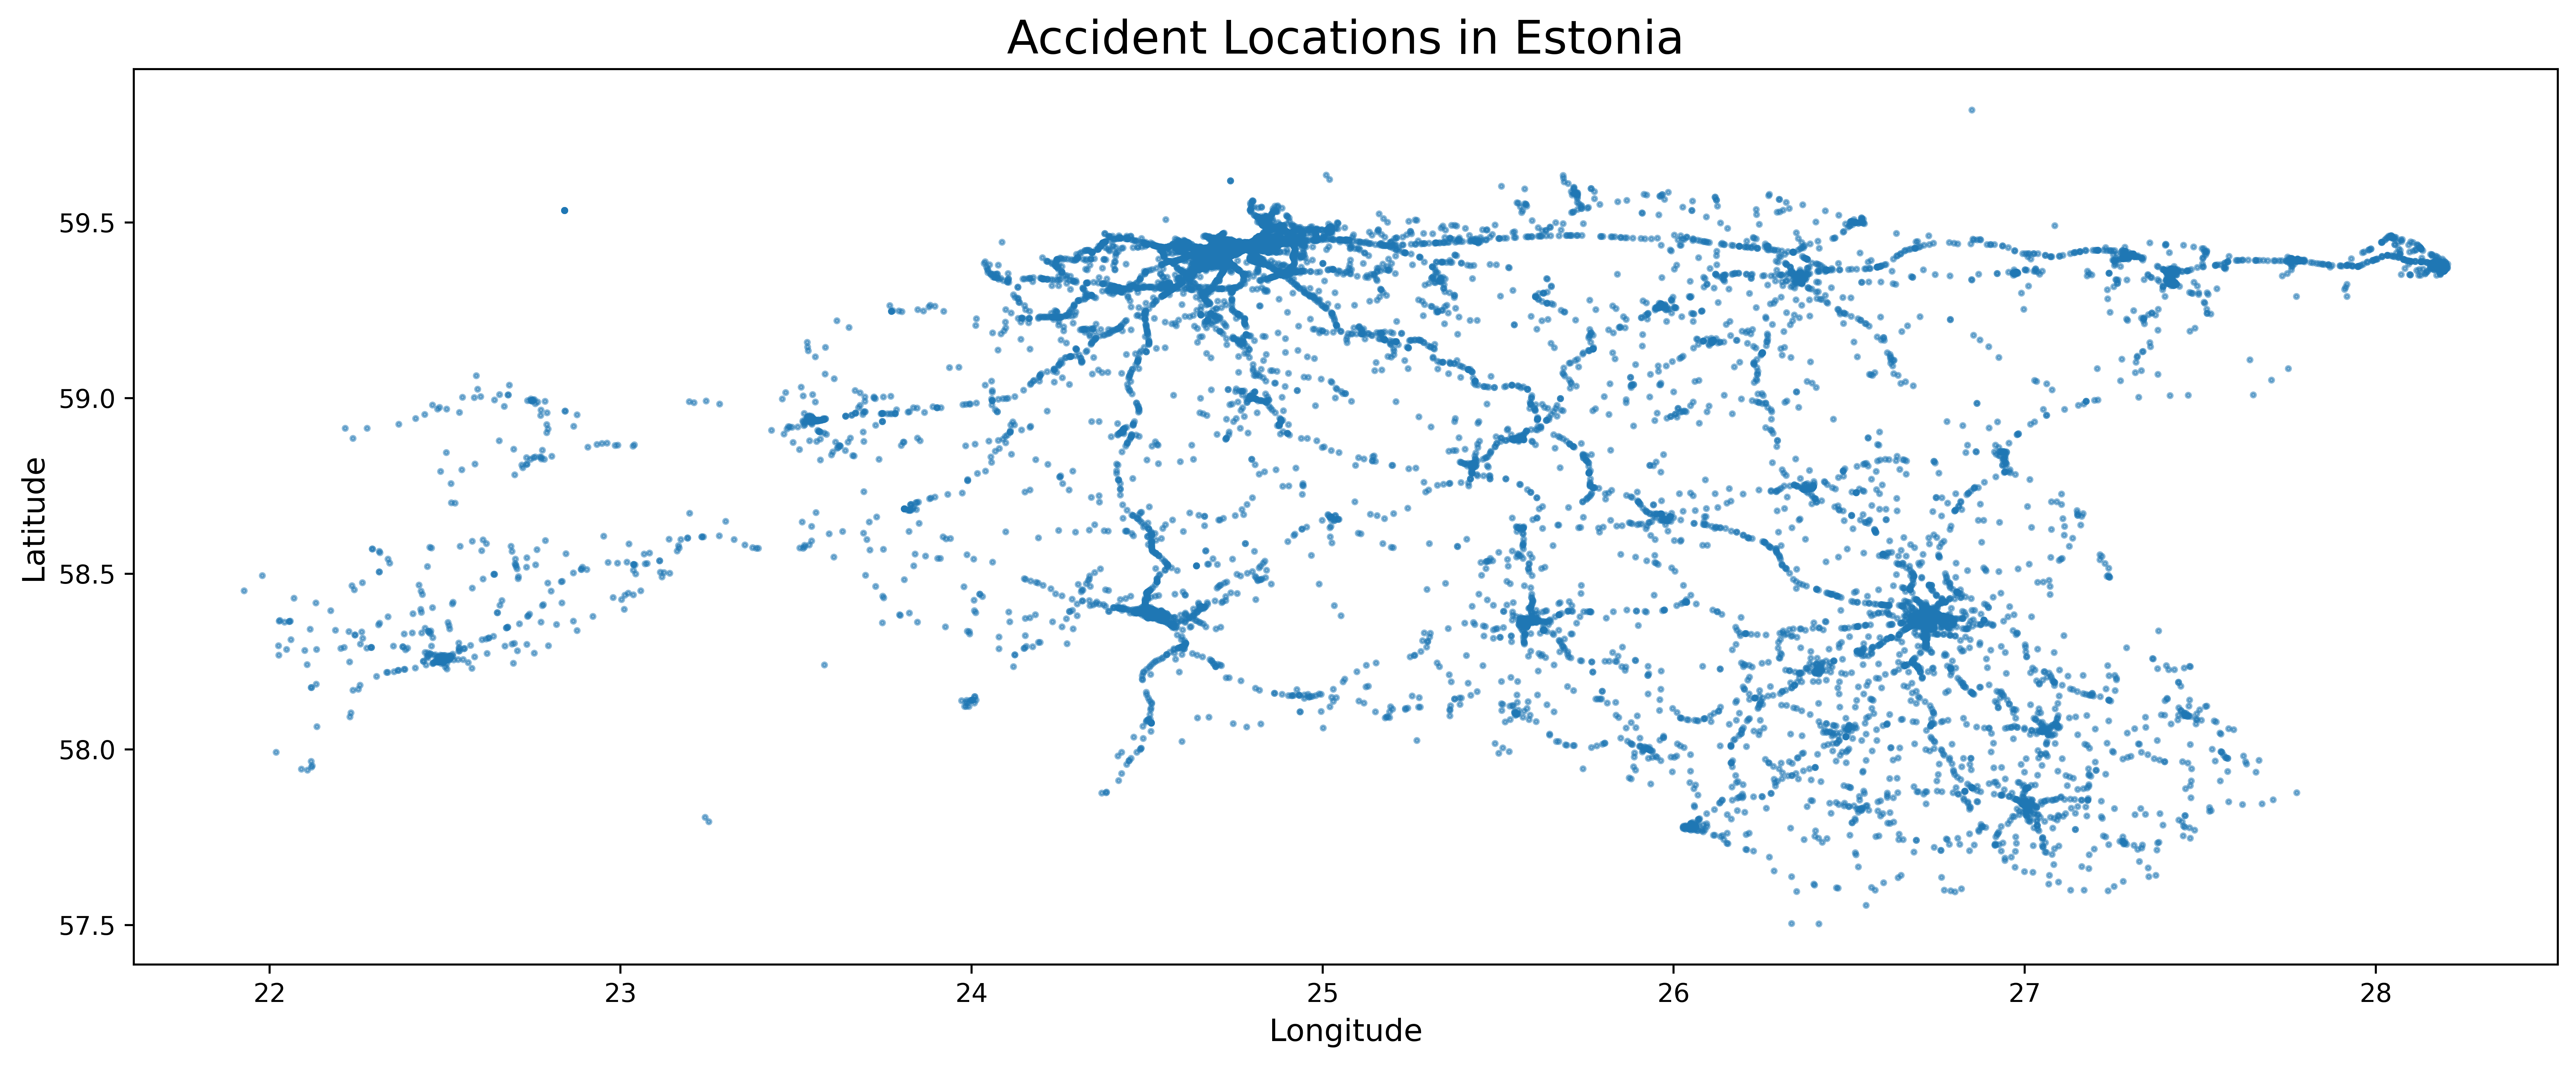

In [37]:
# Kui pole veel:
# !pip install pyproj

import matplotlib.pyplot as plt
from pyproj import Transformer

# 1. L-EST97 (EPSG:3301) -> WGS84 (EPSG:4326) teisendus
transformer = Transformer.from_crs(3301, 4326, always_xy=True)

# Sinu failis on X/Y vahetuses -> kasutame Y kui X ja X kui Y
x_est = df_clean["Y_Coord"].values   # tegelik X
y_est = df_clean["X_Coord"].values   # tegelik Y

lon, lat = transformer.transform(x_est, y_est)

df_clean["lon"] = lon
df_clean["lat"] = lat

# 2. Filtreerime välja veidrad punktid (Eesti piirid ligikaudu)
mask = (
    (df_clean["lon"] > 21) & (df_clean["lon"] < 30) &
    (df_clean["lat"] > 57) & (df_clean["lat"] < 60)
)
df_est = df_clean[mask]

# 3. Joonistame kaardi hea resolutsiooni ja proportsiooniga
plt.figure(figsize=(14, 14), dpi=550)
plt.scatter(
    df_est["lon"],
    df_est["lat"],
    s=3,
    alpha=0.5
)

plt.title("Accident Locations in Estonia", fontsize=18)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()


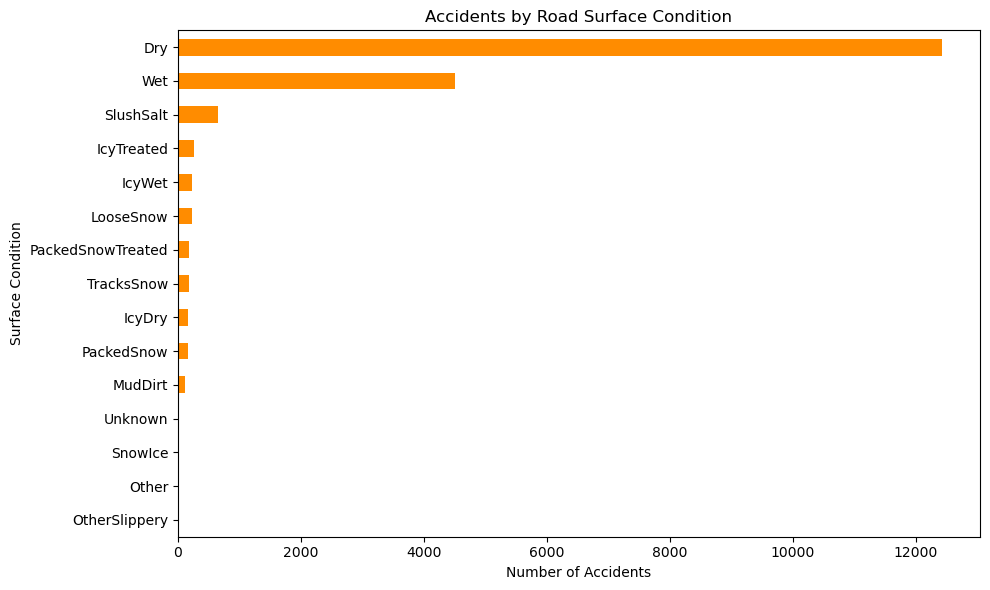

In [45]:
surface_counts = df_clean["RoadSurfaceCondition"].value_counts().sort_values()

plt.figure(figsize=(10, 6))
surface_counts.plot(kind="barh", color="darkorange")
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Surface Condition")
plt.tight_layout()
plt.show()


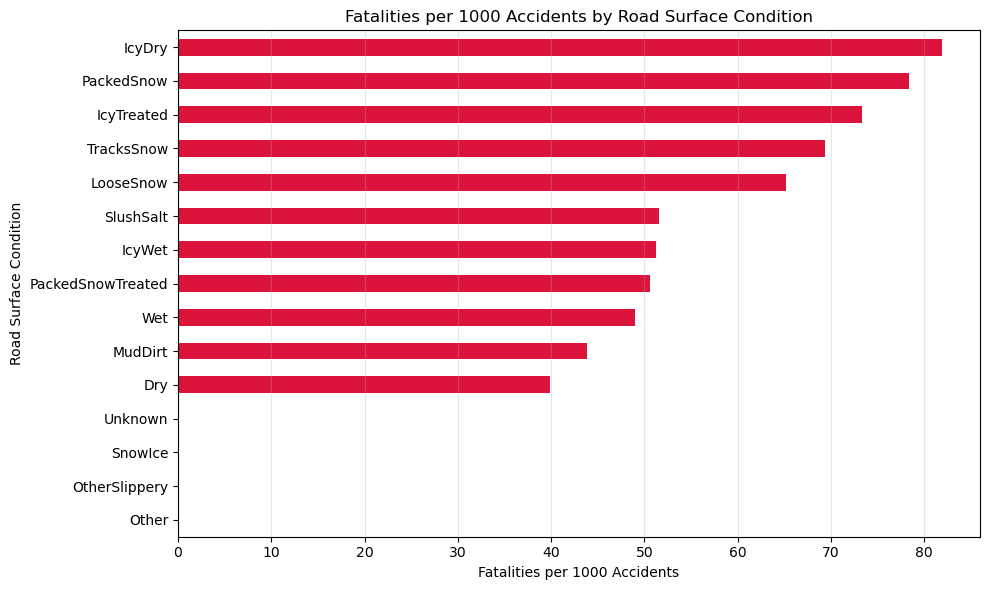

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Count total accidents per road surface
total = df_clean["RoadSurfaceCondition"].value_counts()

# Count fatal accidents per surface (Fatalities >= 1)
fatal = df_clean[df_clean["Fatalities"] >= 1]["RoadSurfaceCondition"].value_counts()

# Ensure all categories are aligned
rates = (fatal / total).fillna(0) * 1000
rates = rates.sort_values()  # sort smallest → biggest risk

plt.figure(figsize=(10, 6))
rates.plot(kind="barh", color="crimson")

plt.title("Fatalities per 1000 Accidents by Road Surface Condition")
plt.xlabel("Fatalities per 1000 Accidents")
plt.ylabel("Road Surface Condition")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


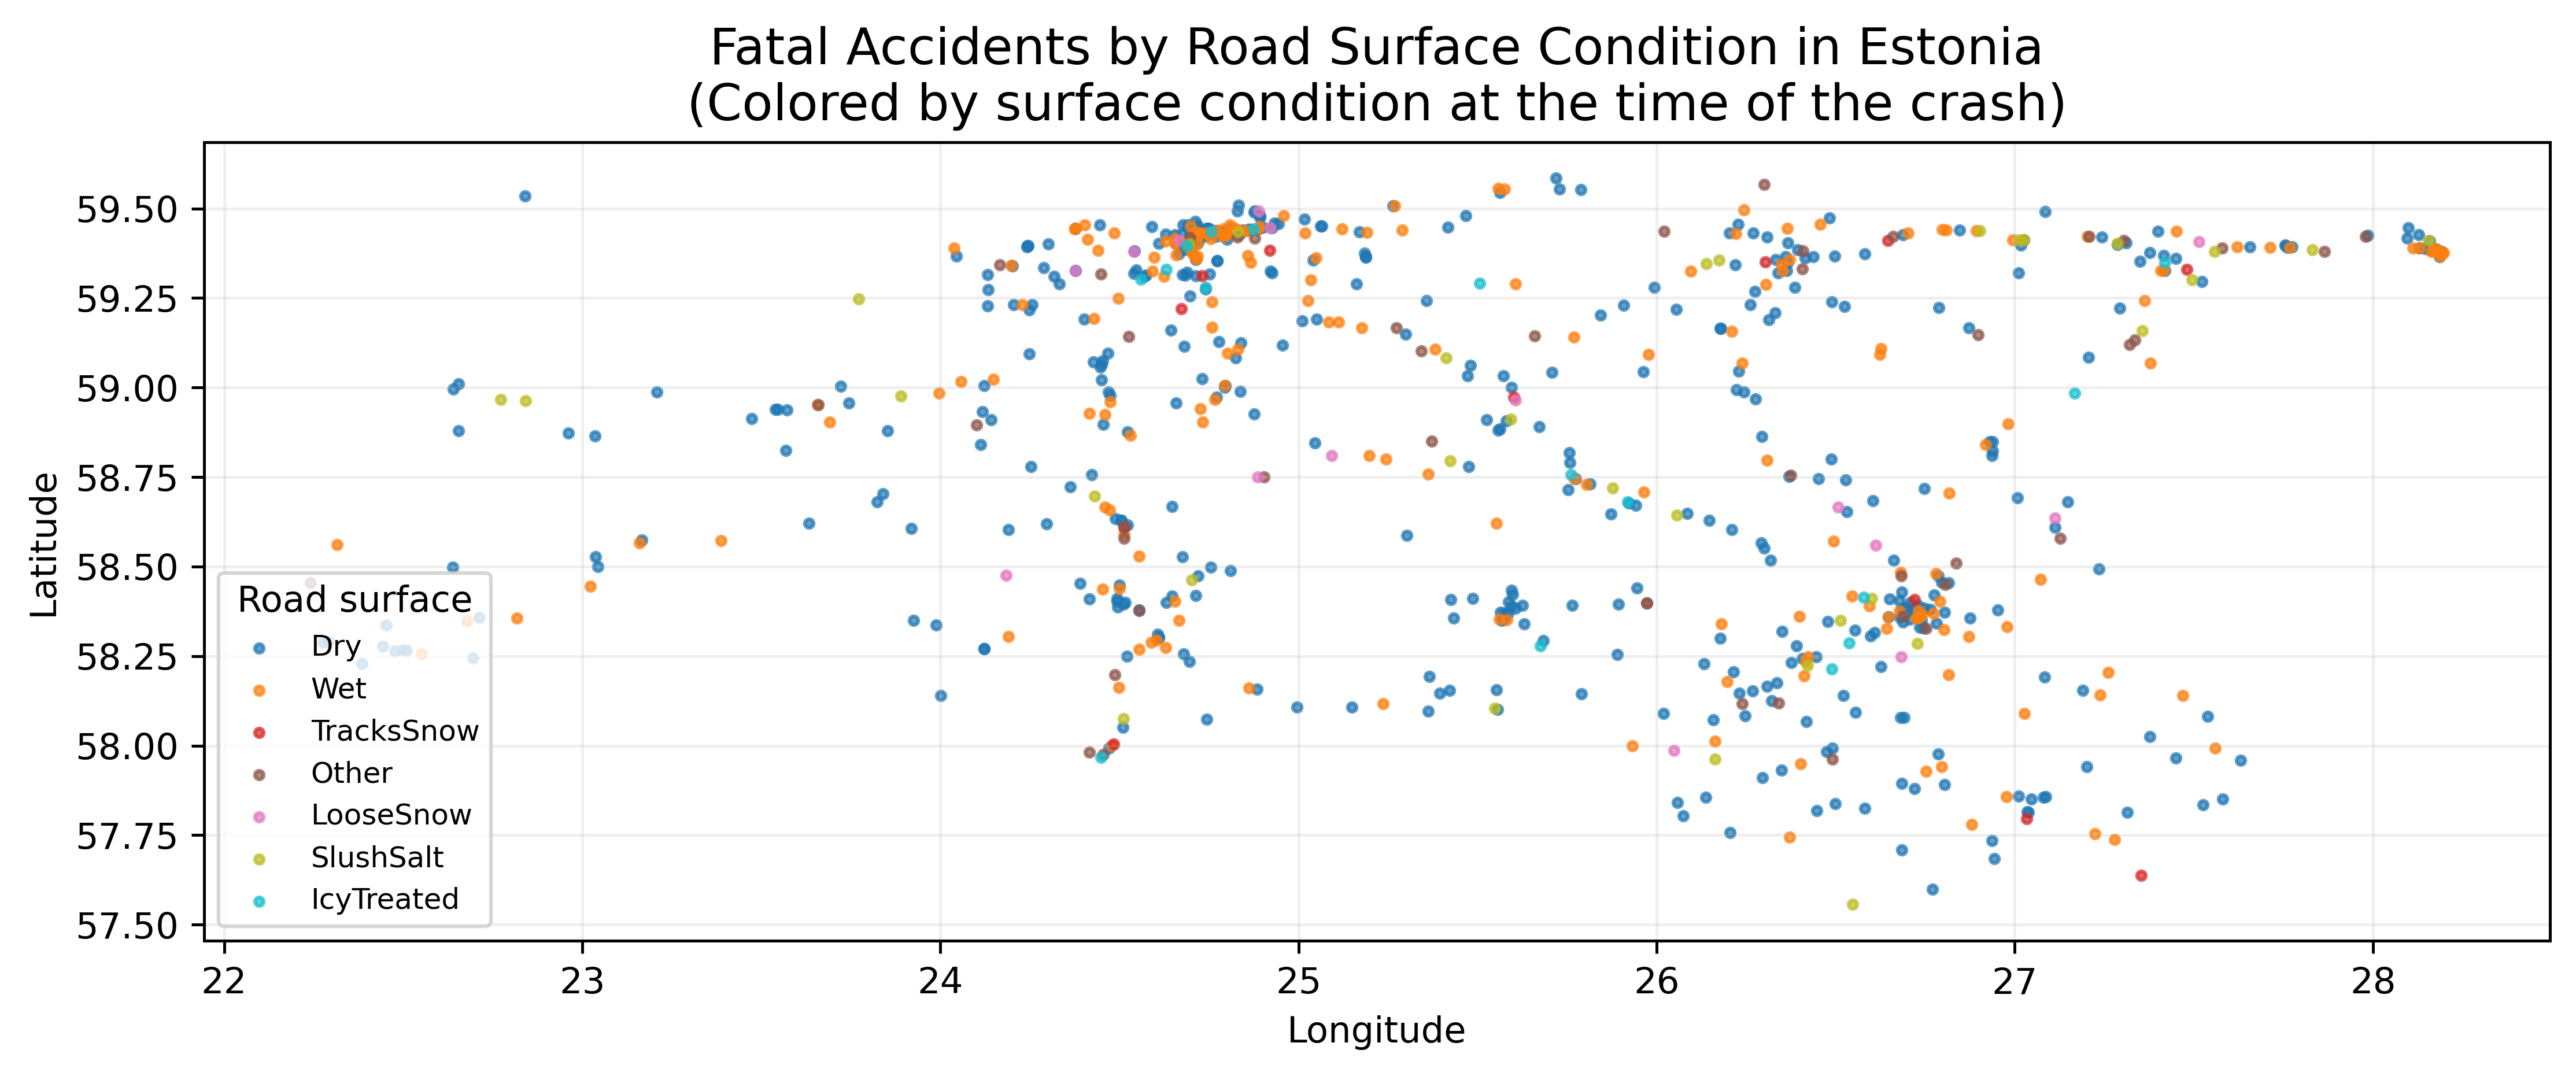

In [51]:
import matplotlib.pyplot as plt
from pyproj import Transformer
import numpy as np

# 1) Koordinaadid (kui juba tehtud, võib selle osa vahele jätta)
transformer = Transformer.from_crs(3301, 4326, always_xy=True)

x_est = df_clean["Y_Coord"].values  # easting
y_est = df_clean["X_Coord"].values  # northing

lon, lat = transformer.transform(x_est, y_est)

df_clean["lon"] = lon
df_clean["lat"] = lat

# 2) Eesti piirid
mask_ee = (
    (df_clean["lon"] > 21) & (df_clean["lon"] < 30) &
    (df_clean["lat"] > 57) & (df_clean["lat"] < 60)
)
d = df_clean[mask_ee].copy()

# 3) Vaatame ainult surmaga lõppenud õnnetusi
fatal = d[d["Fatalities"] >= 1].copy()

# 4) Võtame kõige levinumad tee seisundid (nt top 6)
top_n = 6
top_conditions = fatal["RoadSurfaceCondition"].value_counts().head(top_n).index.tolist()

def cond_group(c):
    return c if c in top_conditions else "Other"

fatal["SurfaceGroup"] = fatal["RoadSurfaceCondition"].apply(cond_group)

# 5) Värvid igale seisundile
unique_conds = fatal["SurfaceGroup"].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_conds)))
color_map = dict(zip(unique_conds, colors))

plt.figure(figsize=(10, 14), dpi=450)

for cond in unique_conds:
    subset = fatal[fatal["SurfaceGroup"] == cond]
    plt.scatter(
        subset["lon"],
        subset["lat"],
        s=6,              # väike punkt, et kaart ei muutuks üheks laikuks
        alpha=0.7,
        c=[color_map[cond]],
        label=cond
    )

plt.title(
    "Fatal Accidents by Road Surface Condition in Estonia\n"
    "(Colored by surface condition at the time of the crash)",
    fontsize=14
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gca().set_aspect("equal", adjustable="box")
plt.grid(alpha=0.2)
plt.legend(title="Road surface", loc="lower left", fontsize=8)
plt.tight_layout()
plt.show()


## Speed limit analysaition

count    19016.000000
mean        60.014199
std         21.029131
min         10.000000
25%         50.000000
50%         50.000000
75%         90.000000
max        120.000000
Name: SpeedLimit, dtype: float64
0 missing values


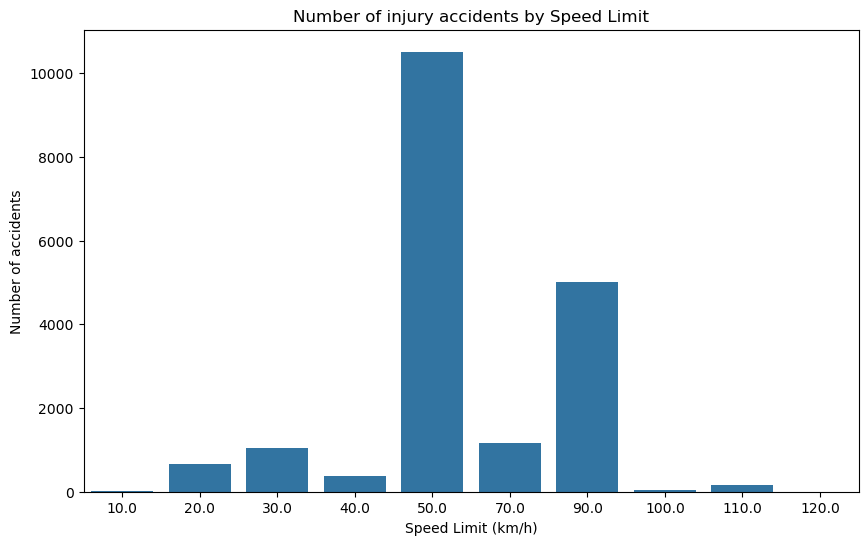

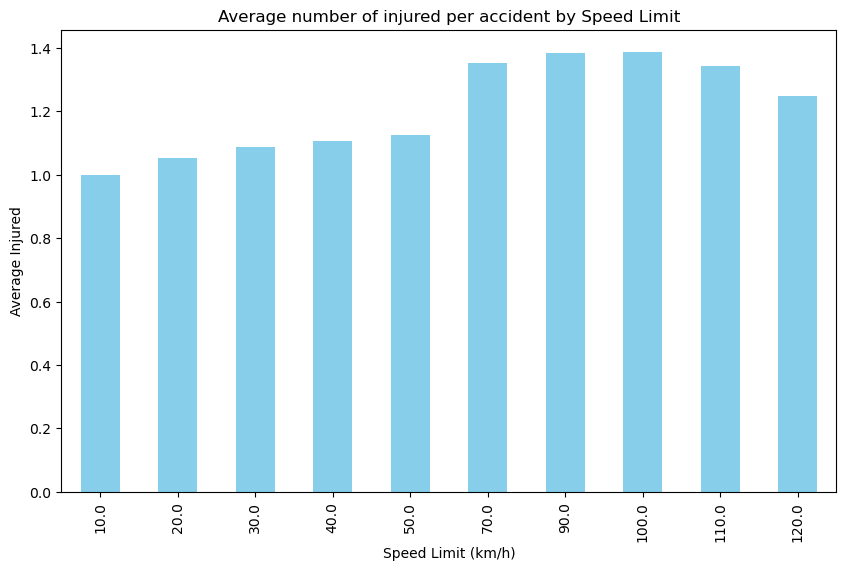

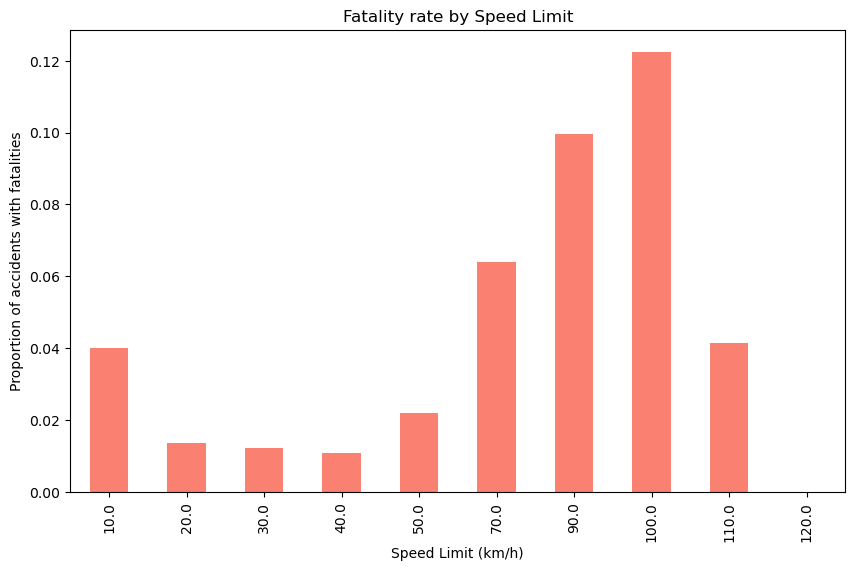

   SpeedLimit  accidents  avg_injured  avg_fatalities  fatality_rate
0        10.0         25     1.000000        0.040000       0.040000
1        20.0        668     1.053892        0.013473       0.013473
2        30.0       1055     1.089100        0.012322       0.012322
3        40.0        366     1.106557        0.010929       0.010929
4        50.0      10510     1.126070        0.022645       0.021979
5        70.0       1172     1.351536        0.069966       0.063993
6        90.0       4998     1.385154        0.110244       0.099640
7       100.0         49     1.387755        0.142857       0.122449
8       110.0        169     1.343195        0.041420       0.041420
9       120.0          4     1.250000        0.000000       0.000000


In [66]:
# 1. Check SpeedLimit column
print(df_clean['SpeedLimit'].describe())
print(df_clean['SpeedLimit'].isna().sum(), "missing values")

# 2. Distribution of accidents by speed limit
plt.figure(figsize=(10,6))
sns.countplot(
    x='SpeedLimit',
    data=df_clean,
    order=sorted(df_clean['SpeedLimit'].dropna().unique())
)
plt.title("Number of injury accidents by Speed Limit")
plt.xlabel("Speed Limit (km/h)")
plt.ylabel("Number of accidents")
plt.show()

# 3. Average injuries per accident by speed limit
injuries_by_limit = df_clean.groupby('SpeedLimit')['Injured'].mean()
plt.figure(figsize=(10,6))
injuries_by_limit.plot(kind='bar', color='skyblue')
plt.title("Average number of injured per accident by Speed Limit")
plt.xlabel("Speed Limit (km/h)")
plt.ylabel("Average Injured")
plt.show()

# 4. Fatality rate by speed limit
fatality_rate = df_clean.groupby('SpeedLimit')['Fatalities'].apply(lambda x: (x > 0).mean())
plt.figure(figsize=(10,6))
fatality_rate.plot(kind='bar', color='salmon')
plt.title("Fatality rate by Speed Limit")
plt.xlabel("Speed Limit (km/h)")
plt.ylabel("Proportion of accidents with fatalities")
plt.show()

# 5. Combined summary table
summary = df_clean.groupby('SpeedLimit').agg(
    accidents=('CaseID','count'),
    avg_injured=('Injured','mean'),
    avg_fatalities=('Fatalities','mean'),
    fatality_rate=('Fatalities', lambda x: (x > 0).mean())
).reset_index()

print(summary)


## Weather analysaition

Weather
Clear               9789
Cloudy              7262
Rain                 937
Snowy                644
LowSun               295
Foggy                117
Storm                 60
Unknown                8
Sleet,Hail             3
Sleet,Hail,Storm       1
Sleet,Hail,Rain        1
Snow,Storm,Rain        1
Other                  1
Cloudy,Wind            1
Name: count, dtype: int64


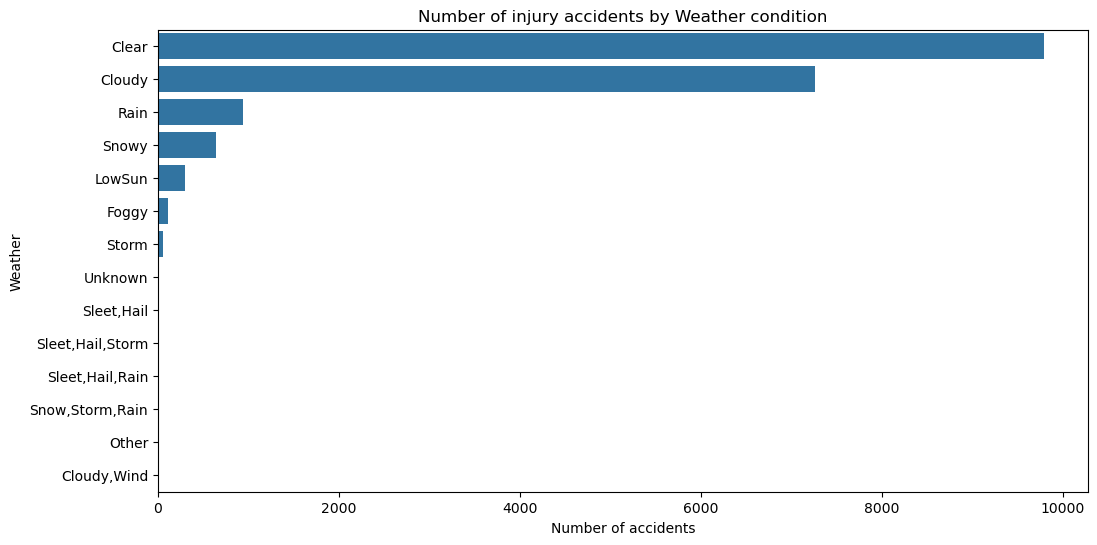

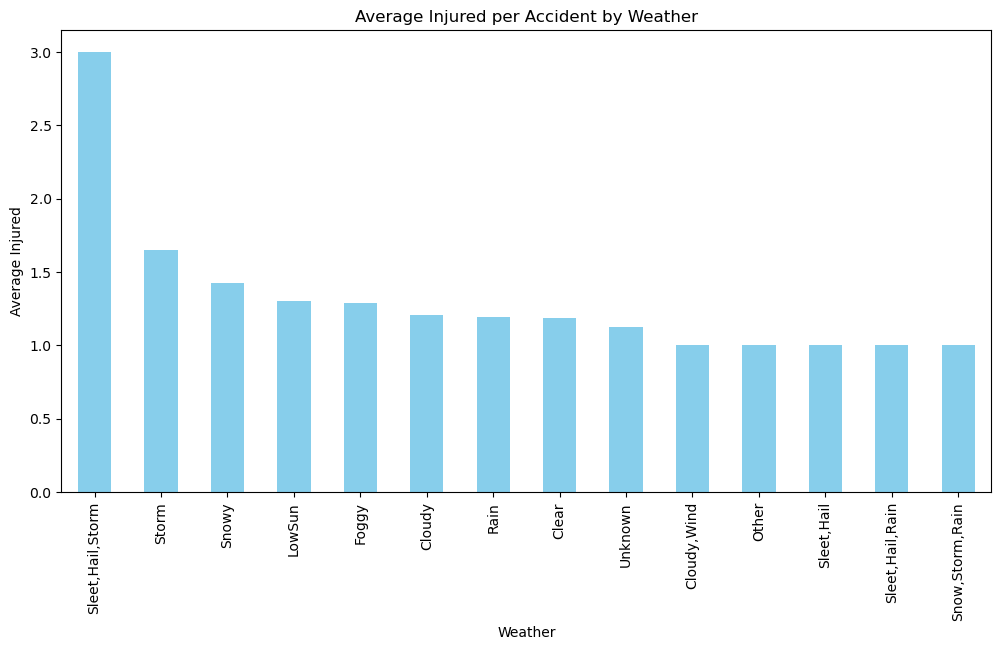

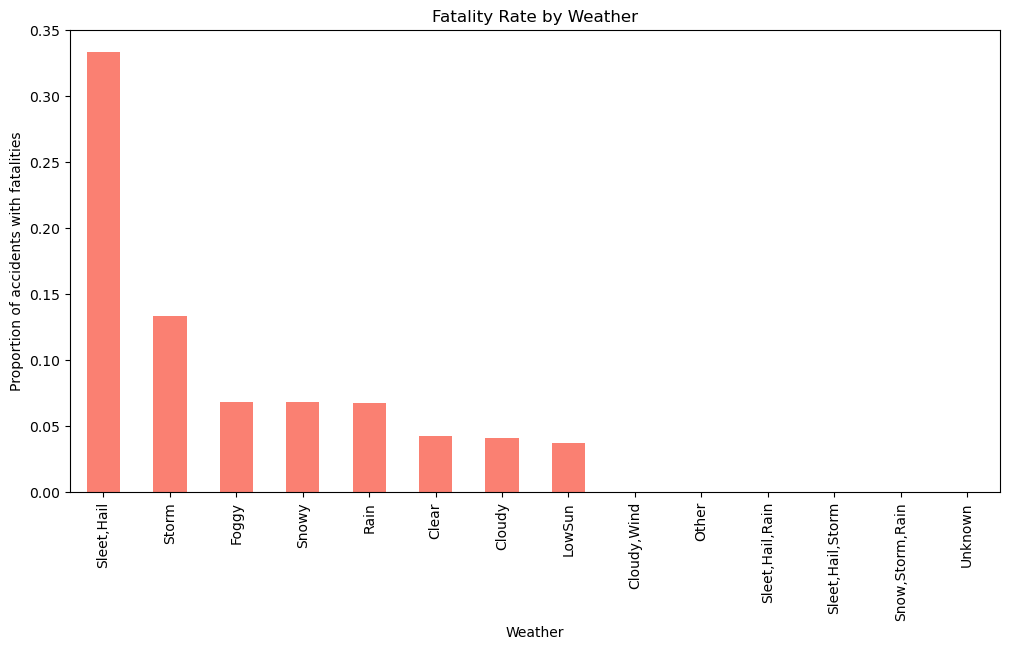

             Weather  accidents  avg_injured  avg_fatalities  fatality_rate
0              Clear       9789     1.185617        0.045459       0.042497
1             Cloudy       7262     1.204902        0.044891       0.041036
6               Rain        937     1.193170        0.069370       0.067236
11             Snowy        644     1.423913        0.074534       0.068323
4             LowSun        295     1.301695        0.040678       0.037288
3              Foggy        117     1.290598        0.094017       0.068376
12             Storm         60     1.650000        0.150000       0.133333
13           Unknown          8     1.125000        0.000000       0.000000
7         Sleet,Hail          3     1.000000        0.333333       0.333333
2        Cloudy,Wind          1     1.000000        0.000000       0.000000
5              Other          1     1.000000        0.000000       0.000000
8    Sleet,Hail,Rain          1     1.000000        0.000000       0.000000
9   Sleet,Ha

In [27]:
# 1. Check unique weather categories
print(df_clean['Weather'].value_counts())

# 2. Distribution of accidents by weather
plt.figure(figsize=(12,6))
sns.countplot(y='Weather', data=df_clean, order=df_clean['Weather'].value_counts().index)
plt.title("Number of injury accidents by Weather condition")
plt.xlabel("Number of accidents")
plt.ylabel("Weather")
plt.show()

# 3. Average injuries per accident by weather
injuries_by_weather = df_clean.groupby('Weather')['Injured'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
injuries_by_weather.plot(kind='bar', color='skyblue')
plt.title("Average Injured per Accident by Weather")
plt.xlabel("Weather")
plt.ylabel("Average Injured")
plt.show()

# 4. Fatality rate by weather
fatality_rate_weather = df_clean.groupby('Weather')['Fatalities'].apply(lambda x: (x>0).mean()).sort_values(ascending=False)
plt.figure(figsize=(12,6))
fatality_rate_weather.plot(kind='bar', color='salmon')
plt.title("Fatality Rate by Weather")
plt.xlabel("Weather")
plt.ylabel("Proportion of accidents with fatalities")
plt.show()

# 5. Combined summary table
weather_summary = df_clean.groupby('Weather').agg(
    accidents=('CaseID','count'),
    avg_injured=('Injured','mean'),
    avg_fatalities=('Fatalities','mean'),
    fatality_rate=('Fatalities', lambda x: (x>0).mean())
).reset_index().sort_values(by='accidents', ascending=False)

print(weather_summary)


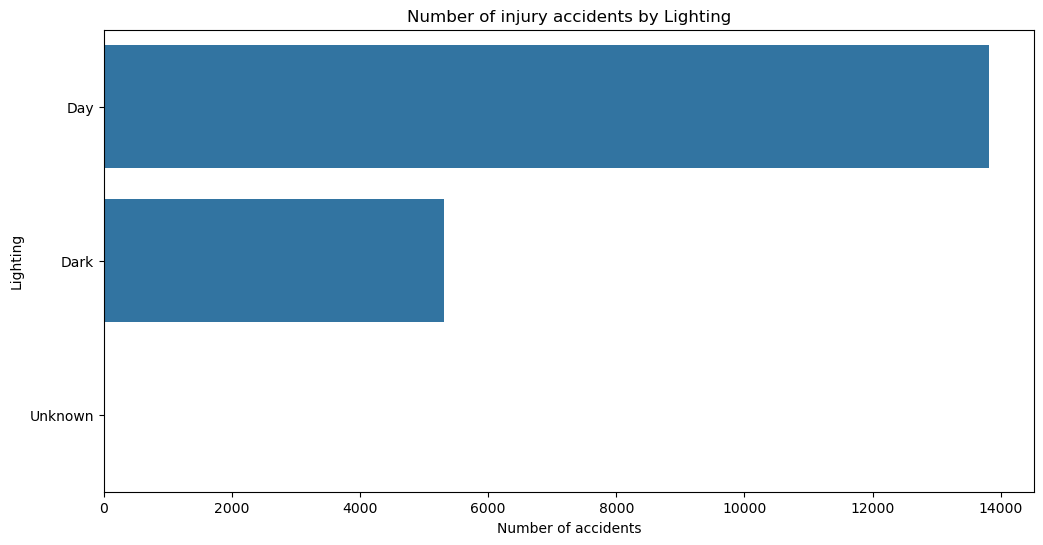

Lighting summary:
  Lighting  accidents  avg_injured  avg_fatalities  fatality_rate
1      Day      13826     1.199262        0.040142       0.037032
0     Dark       5306     1.220128        0.067659       0.063325
2  Unknown          7     1.142857        0.000000       0.000000


In [28]:
# --- LIGHTING ---
plt.figure(figsize=(12,6))
sns.countplot(y='Lighting', data=df_clean, order=df_clean['Lighting'].value_counts().index)
plt.title("Number of injury accidents by Lighting")
plt.xlabel("Number of accidents")
plt.ylabel("Lighting")
plt.show()

lighting_summary = df_clean.groupby('Lighting').agg(
    accidents=('CaseID','count'),
    avg_injured=('Injured','mean'),
    avg_fatalities=('Fatalities','mean'),
    fatality_rate=('Fatalities', lambda x: (x>0).mean())
).reset_index().sort_values(by='accidents', ascending=False)

print("Lighting summary:")
print(lighting_summary)

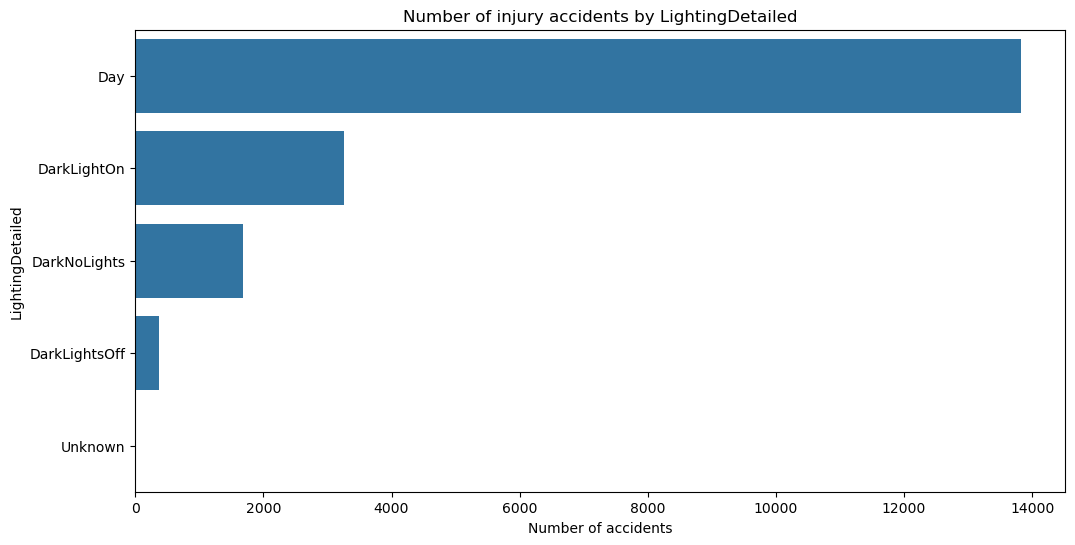

LightingDetailed summary:
  LightingDetailed  accidents  avg_injured  avg_fatalities  fatality_rate
3              Day      13826     1.199262        0.040142       0.037032
0      DarkLightOn       3260     1.150000        0.030368       0.029448
2     DarkNoLights       1681     1.332540        0.132659       0.122546
1    DarkLightsOff        365     1.328767        0.101370       0.093151
4          Unknown          7     1.142857        0.000000       0.000000


In [29]:
# --- LIGHTING DETAILED ---
plt.figure(figsize=(12,6))
sns.countplot(y='LightingDetailed', data=df_clean, order=df_clean['LightingDetailed'].value_counts().index)
plt.title("Number of injury accidents by LightingDetailed")
plt.xlabel("Number of accidents")
plt.ylabel("LightingDetailed")
plt.show()

lighting_detailed_summary = df_clean.groupby('LightingDetailed').agg(
    accidents=('CaseID','count'),
    avg_injured=('Injured','mean'),
    avg_fatalities=('Fatalities','mean'),
    fatality_rate=('Fatalities', lambda x: (x>0).mean())
).reset_index().sort_values(by='accidents', ascending=False)

print("LightingDetailed summary:")
print(lighting_detailed_summary)

## Participants’ types and risk behavior analysis

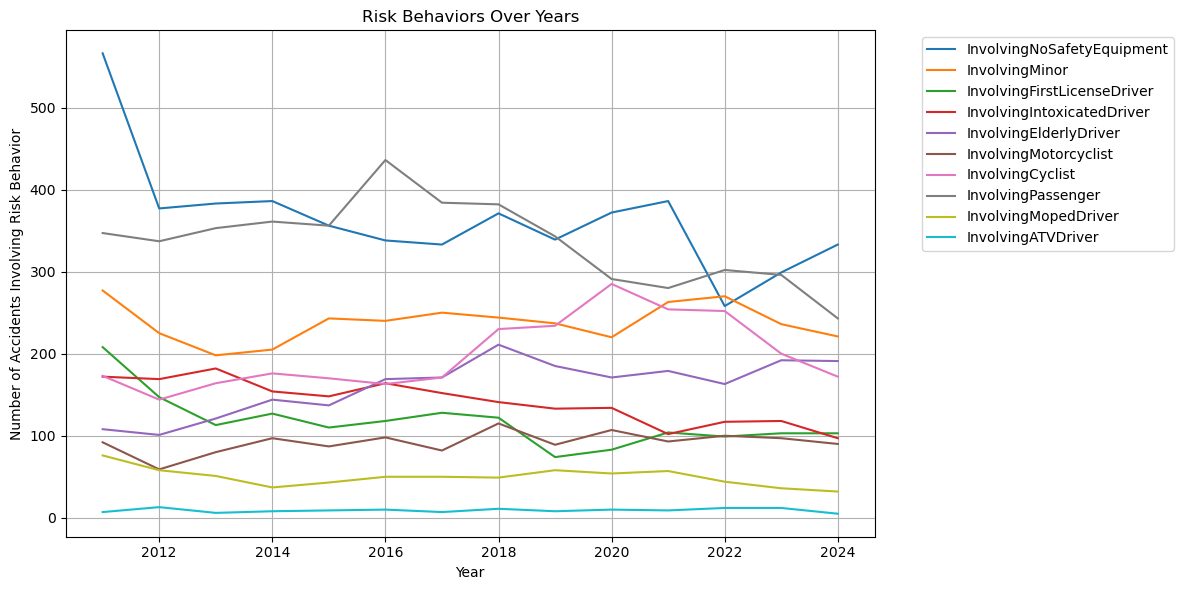

In [67]:
risk_cols = [
    "InvolvingNoSafetyEquipment",
    "InvolvingMinor",
    "InvolvingFirstLicenseDriver",
    "InvolvingIntoxicatedDriver",
    "InvolvingElderlyDriver",
    "InvolvingMotorcyclist",
    "InvolvingCyclist",
    "InvolvingPassenger",
    "InvolvingMopedDriver",
    "InvolvingATVDriver"
]

df_clean.groupby("Year")[risk_cols].sum().plot(figsize=(12,6))
plt.title("Risk Behaviors Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents Involving Risk Behavior")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\miajohanna\AppData\Local\Temp\ipykernel_30604\3958558761.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=participant_counts.values, y=participant_counts.index, palette="viridis")


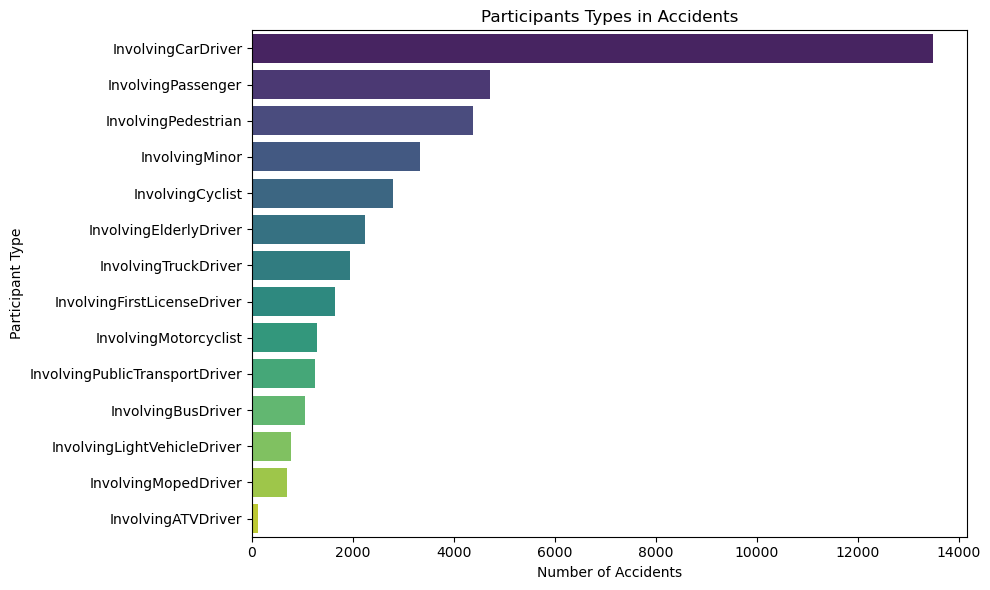

In [68]:
participant_cols = [
    "InvolvingCarDriver","InvolvingTruckDriver","InvolvingBusDriver",
    "InvolvingMotorcyclist","InvolvingMopedDriver","InvolvingCyclist",
    "InvolvingPedestrian","InvolvingPassenger","InvolvingPublicTransportDriver",
    "InvolvingLightVehicleDriver","InvolvingATVDriver","InvolvingMinor",
    "InvolvingFirstLicenseDriver","InvolvingElderlyDriver"
]

participant_counts = df_clean[participant_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=participant_counts.values, y=participant_counts.index, palette="viridis")
plt.title("Participants Types in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Participant Type")
plt.tight_layout()
plt.show()


C:\Users\miajohanna\AppData\Local\Temp\ipykernel_30604\184618766.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatal_counts.values, y=fatal_counts.index, palette="Reds")


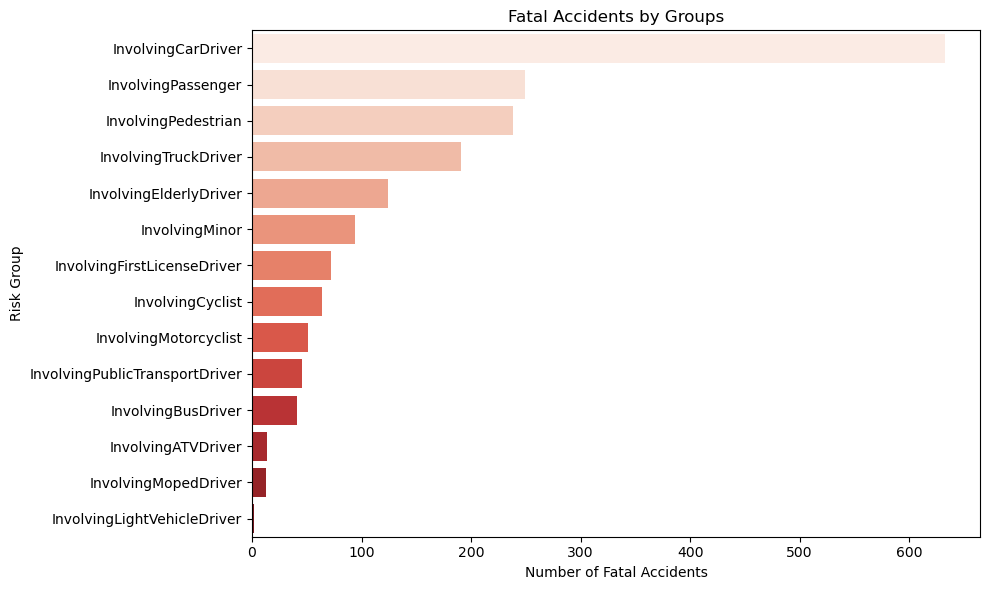

In [74]:
# Defineerime riskigrupid
participant_cols = [
    "InvolvingCarDriver","InvolvingTruckDriver","InvolvingBusDriver",
    "InvolvingMotorcyclist","InvolvingMopedDriver","InvolvingCyclist",
    "InvolvingPedestrian","InvolvingPassenger","InvolvingPublicTransportDriver",
    "InvolvingLightVehicleDriver","InvolvingATVDriver","InvolvingMinor",
    "InvolvingFirstLicenseDriver","InvolvingElderlyDriver"
]


# Filtreerime ainult surmaga lõppenud õnnetused
fatal_cases = df_clean[df_clean["Fatalities"] > 0]

# Loeme kokku, mitu surmaga lõppenud õnnetust igas riskigrupis
fatal_counts = fatal_cases[participant_cols].sum().sort_values(ascending=False)

# Joonistame bar charti
plt.figure(figsize=(10,6))
sns.barplot(x=fatal_counts.values, y=fatal_counts.index, palette="Reds")
plt.title("Fatal Accidents by Groups")
plt.xlabel("Number of Fatal Accidents")
plt.ylabel("Risk Group")
plt.tight_layout()
plt.show()



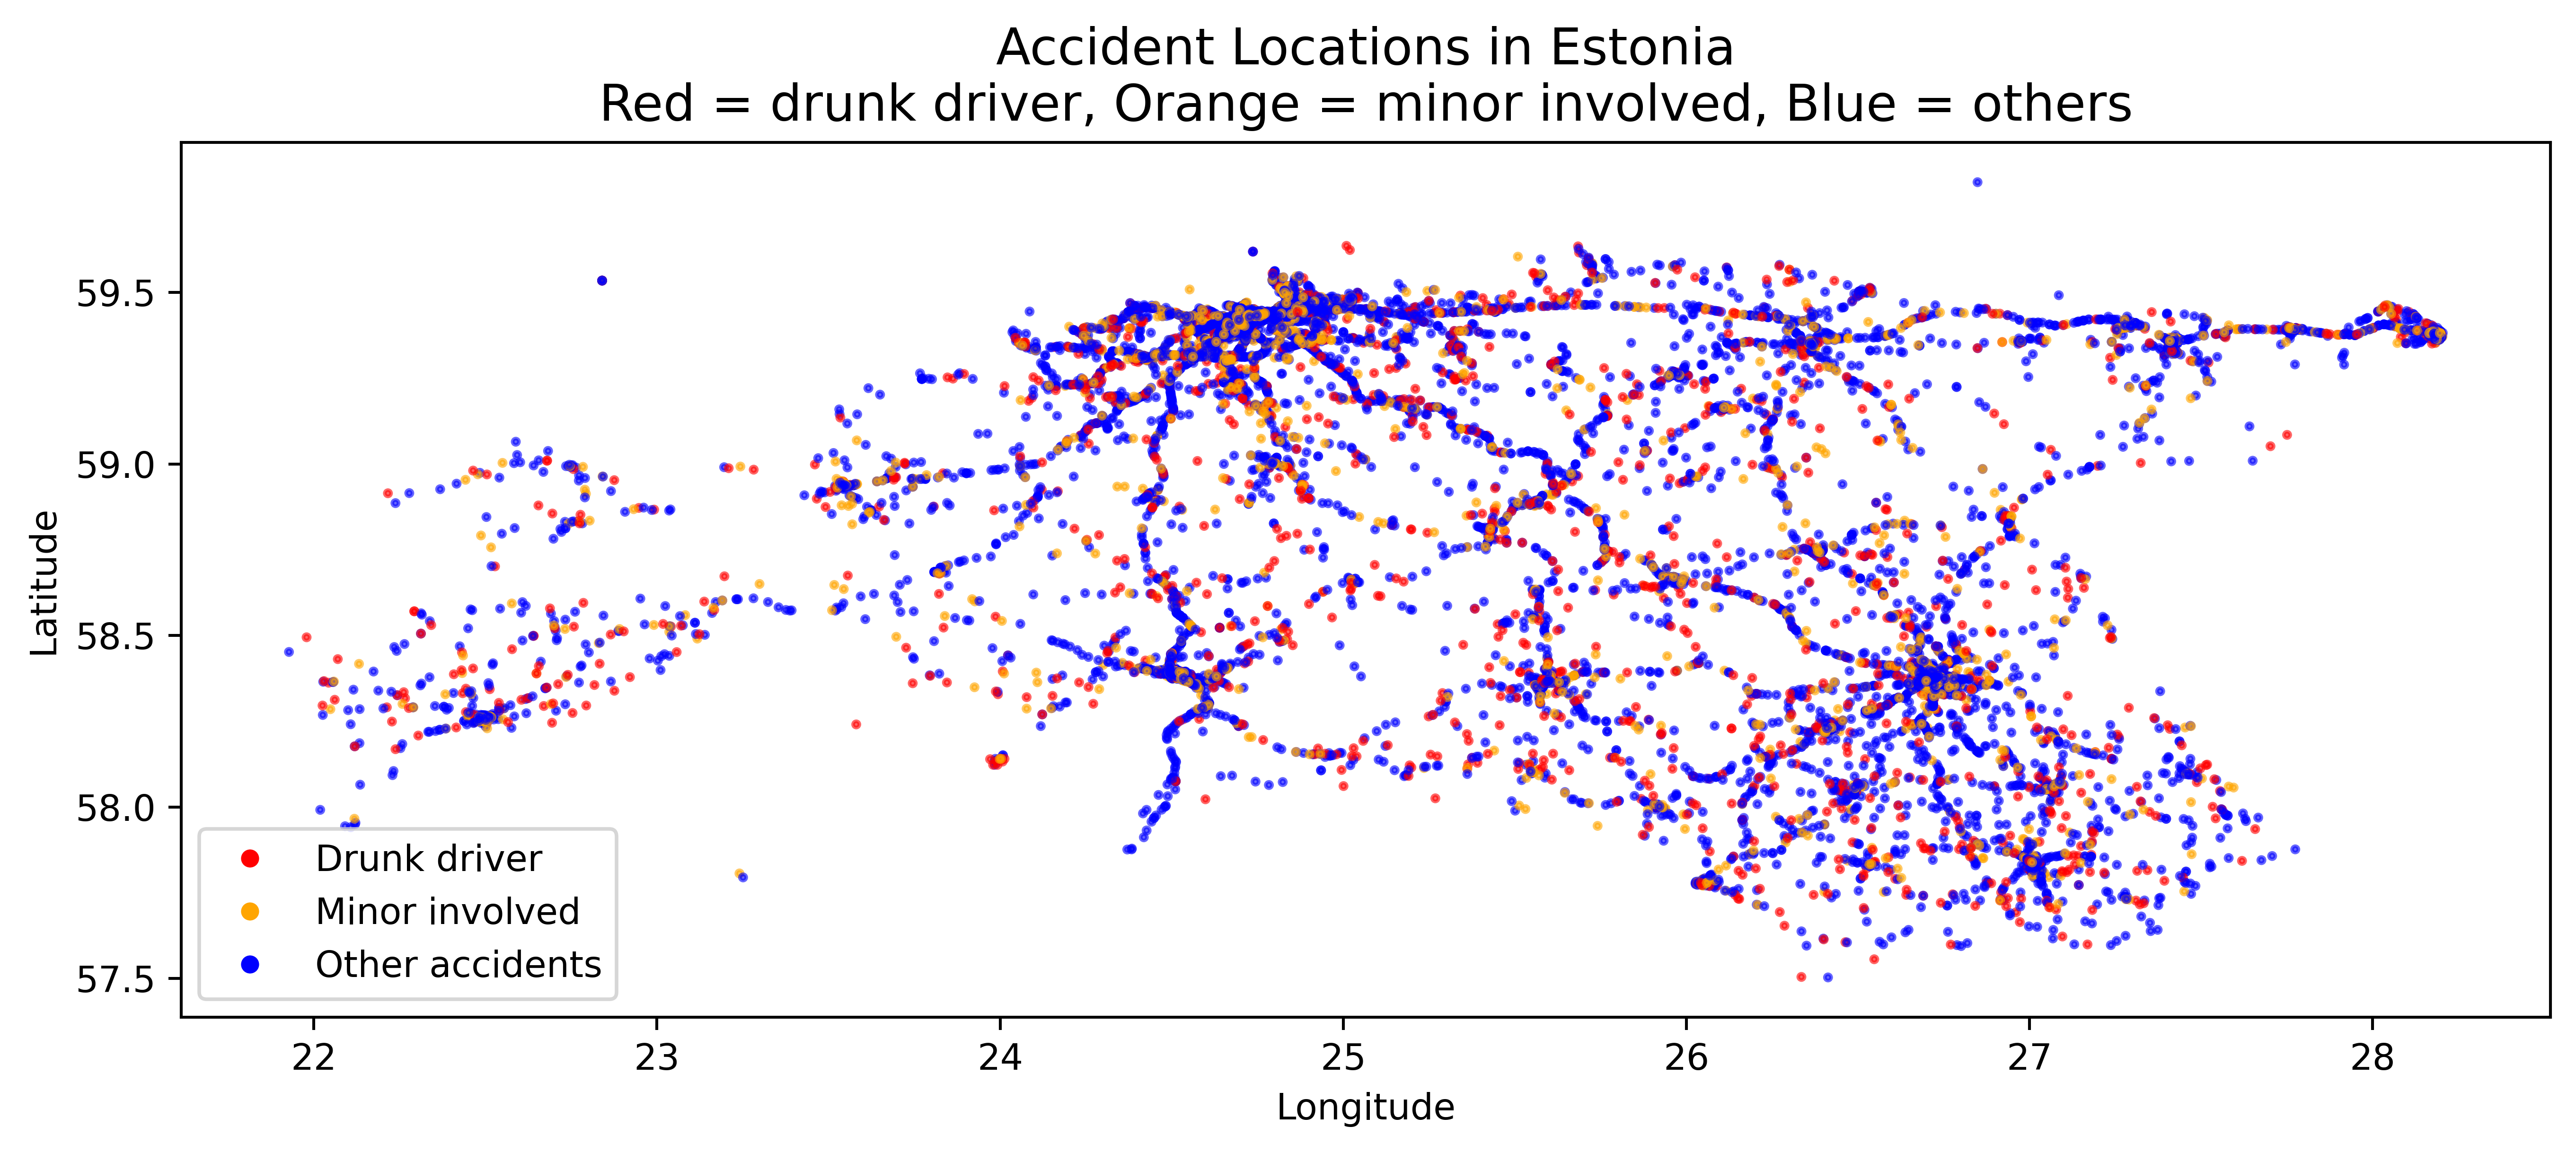

In [38]:
import matplotlib.pyplot as plt
from pyproj import Transformer
import numpy as np
from matplotlib.lines import Line2D

# 1. Convert L-EST97 -> WGS84 coordinates (df_clean)
transformer = Transformer.from_crs(3301, 4326, always_xy=True)

# X_Coord = northing, Y_Coord = easting (reversed in dataset)
x_est = df_clean["Y_Coord"].values
y_est = df_clean["X_Coord"].values

lon, lat = transformer.transform(x_est, y_est)

df_clean["lon"] = lon
df_clean["lat"] = lat

# 2. Keep only Estonia region
mask_ee = (
    (df_clean["lon"] > 21) & (df_clean["lon"] < 30) &
    (df_clean["lat"] > 57) & (df_clean["lat"] < 60)
)
df2 = df_clean[mask_ee].copy()

# 3. Column names for flags
col_drunk = "InvolvingIntoxicatedDriver"
col_minor = "InvolvingMinor"

# 4. Assign colors:
#    red = drunk, orange = minor, blue = neither
colors = np.where(
    df2[col_drunk] == 1, "red",
    np.where(df2[col_minor] == 1, "orange", "blue")
)

# 5. Plot
plt.figure(figsize=(10, 14), dpi=550)
plt.scatter(df2["lon"], df2["lat"], c=colors, s=3, alpha=0.6)

plt.title(
    "Accident Locations in Estonia\n"
    "Red = drunk driver, Orange = minor involved, Blue = others",
    fontsize=14
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()

# 6. Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', 
           label='Drunk driver', markerfacecolor='red', markersize=6),
    Line2D([0], [0], marker='o', color='w', 
           label='Minor involved', markerfacecolor='orange', markersize=6),
    Line2D([0], [0], marker='o', color='w', 
           label='Other accidents', markerfacecolor='blue', markersize=6)
]
plt.legend(handles=legend_elements, loc='lower left')

plt.show()


## Drunk driver analysaition

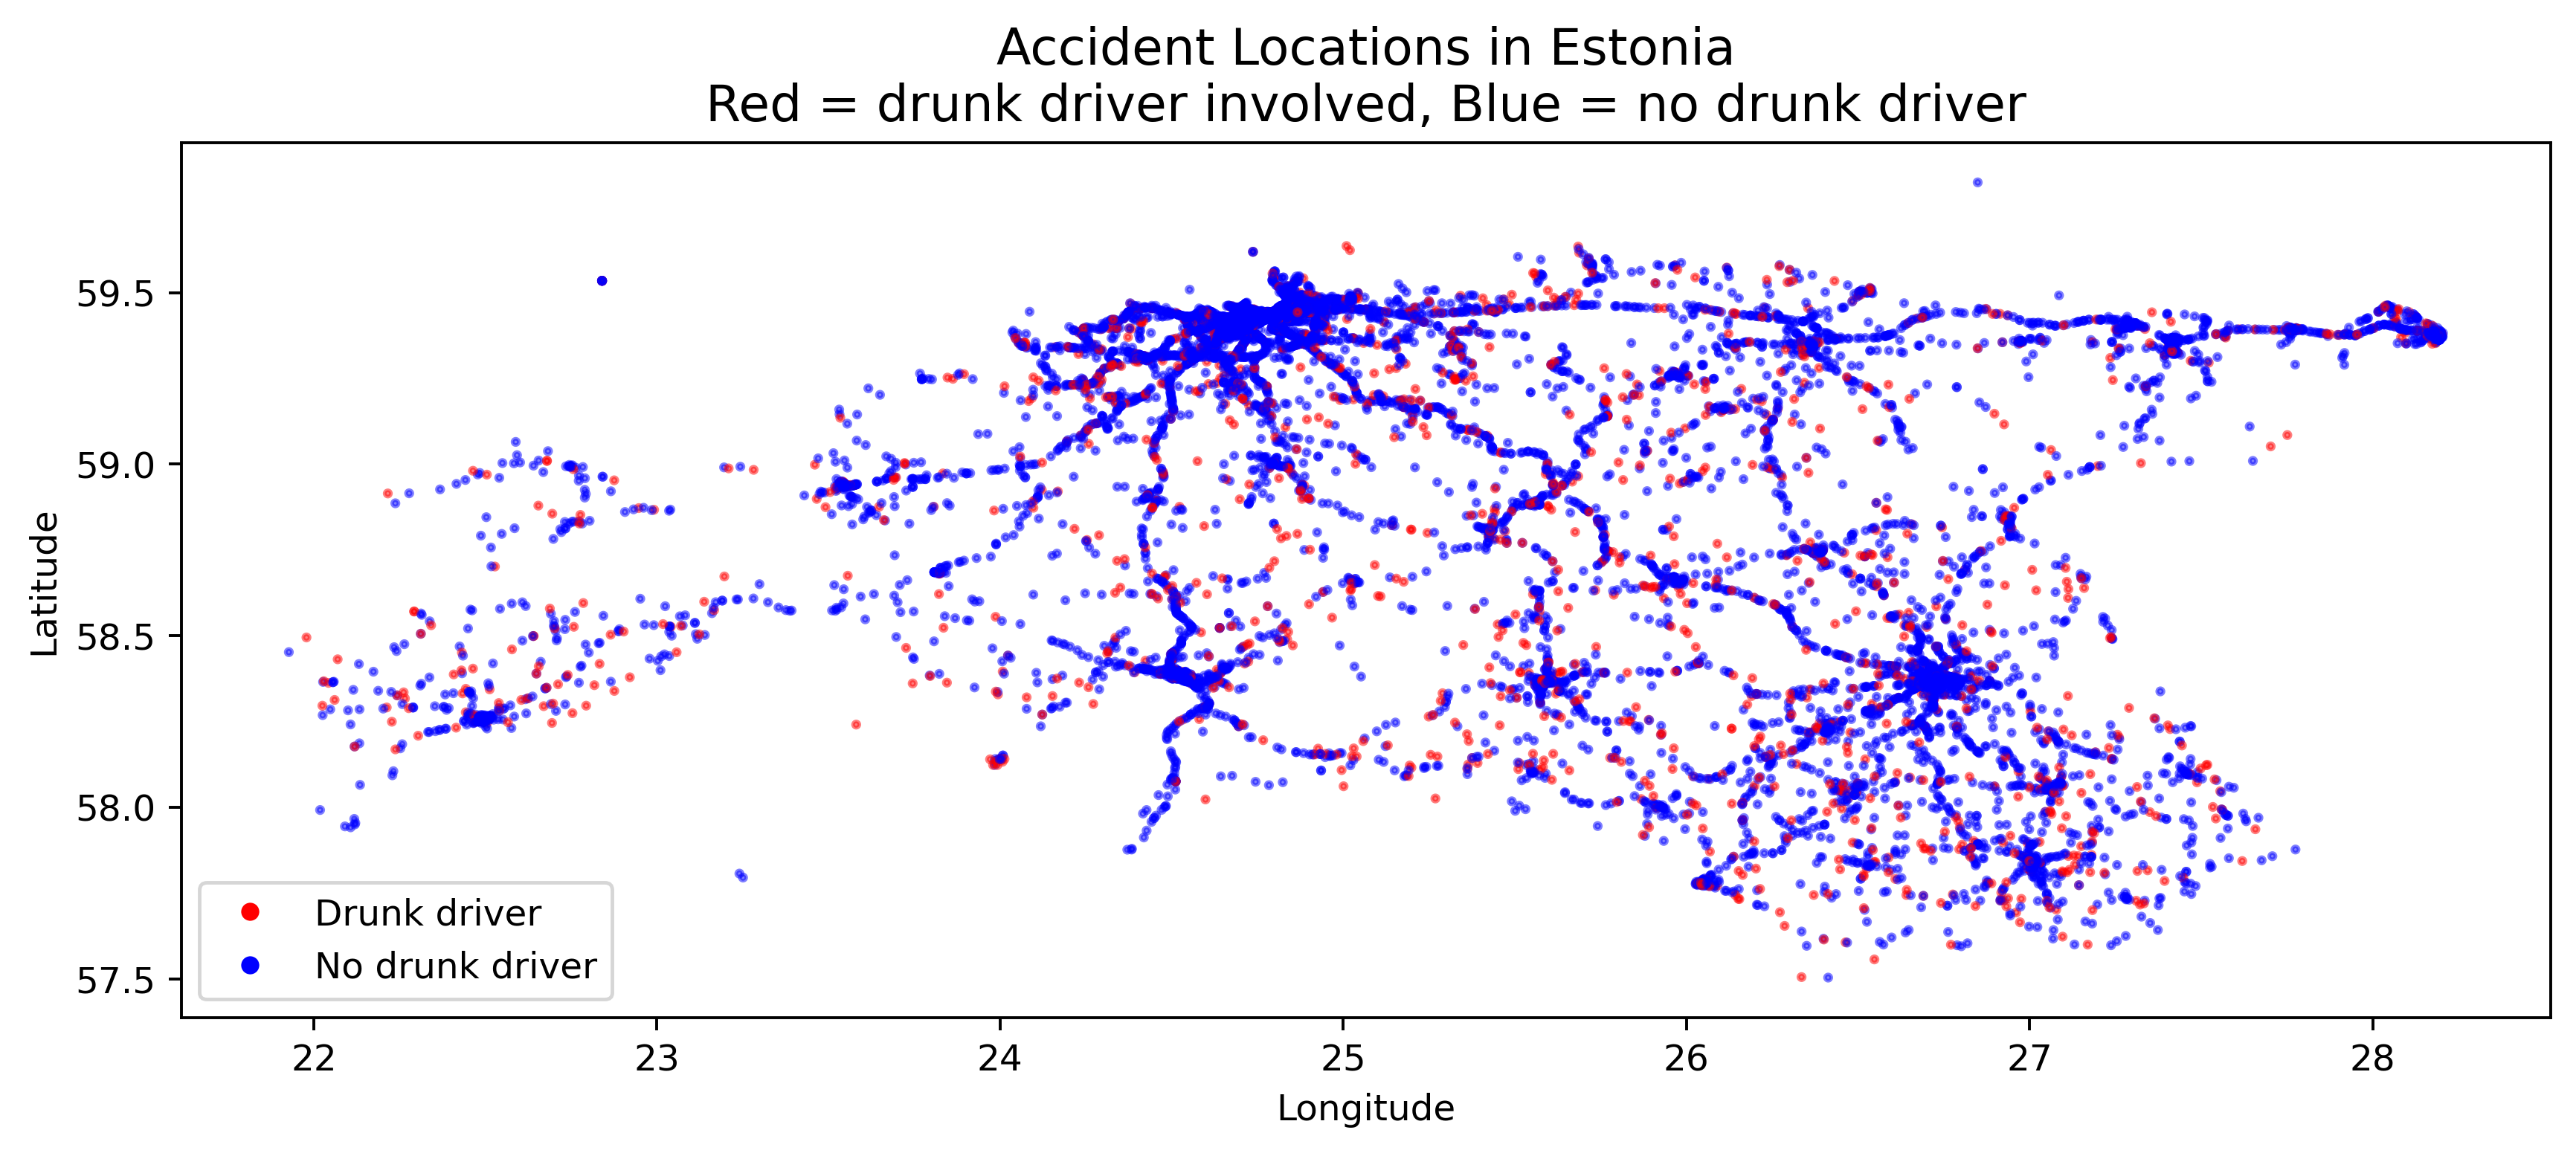

In [39]:
import matplotlib.pyplot as plt
from pyproj import Transformer
import numpy as np
from matplotlib.lines import Line2D

# 1. Convert L-EST97 -> WGS84 coordinates
transformer = Transformer.from_crs(3301, 4326, always_xy=True)

# Dataset stores X/Y reversed
x_est = df_clean["Y_Coord"].values
y_est = df_clean["X_Coord"].values

lon, lat = transformer.transform(x_est, y_est)

df_clean["lon"] = lon
df_clean["lat"] = lat

# 2. Keep only rows where drunk-driver flag is known (0 or 1)
col_drunk = "InvolvingIntoxicatedDriver"
df2 = df_clean[df_clean[col_drunk].isin([0, 1])].copy()

# Optional Estonia boundary filter
mask_ee = (
    (df2["lon"] > 21) & (df2["lon"] < 30) &
    (df2["lat"] > 57) & (df2["lat"] < 60)
)
df2 = df2[mask_ee]

# 3. Colors: drunk = red, sober = blue
drunk_mask = df2[col_drunk] == 1
colors = np.where(drunk_mask, "red", "blue")

# 4. Plot
plt.figure(figsize=(10, 14), dpi=350)
plt.scatter(df2["lon"], df2["lat"], c=colors, s=3, alpha=0.5)

plt.title(
    "Accident Locations in Estonia\n"
    "Red = drunk driver involved, Blue = no drunk driver",
    fontsize=14
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()

# 5. Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label='Drunk driver', markerfacecolor='red', markersize=6),
    Line2D([0], [0], marker='o', color='w',
           label='No drunk driver', markerfacecolor='blue', markersize=6),
]

plt.legend(handles=legend_elements, loc='lower left')
plt.show()


## Deadly accidents' analysaition

C:\Users\arminlii\AppData\Local\anaconda3\envs\estonian-traffic\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
C:\Users\arminlii\AppData\Local\anaconda3\envs\estonian-traffic\lib\site-packages\xgboost\training.py:199: UserWarning: [09:59:48] WARNING: D:\bld\xgboost-split_1764148481205\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Default threshold (0.5):
[[5160   95]
 [ 215   30]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5255
           1       0.24      0.12      0.16       245

    accuracy                           0.94      5500
   macro avg       0.60      0.55      0.57      5500
weighted avg       0.93      0.94      0.93      5500


Custom threshold (0.35):
[[5073  182]
 [ 201   44]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5255
           1       0.19      0.18      0.19       245

    accuracy                           0.93      5500
   macro avg       0.58      0.57      0.58      5500
weighted avg       0.93      0.93      0.93      5500



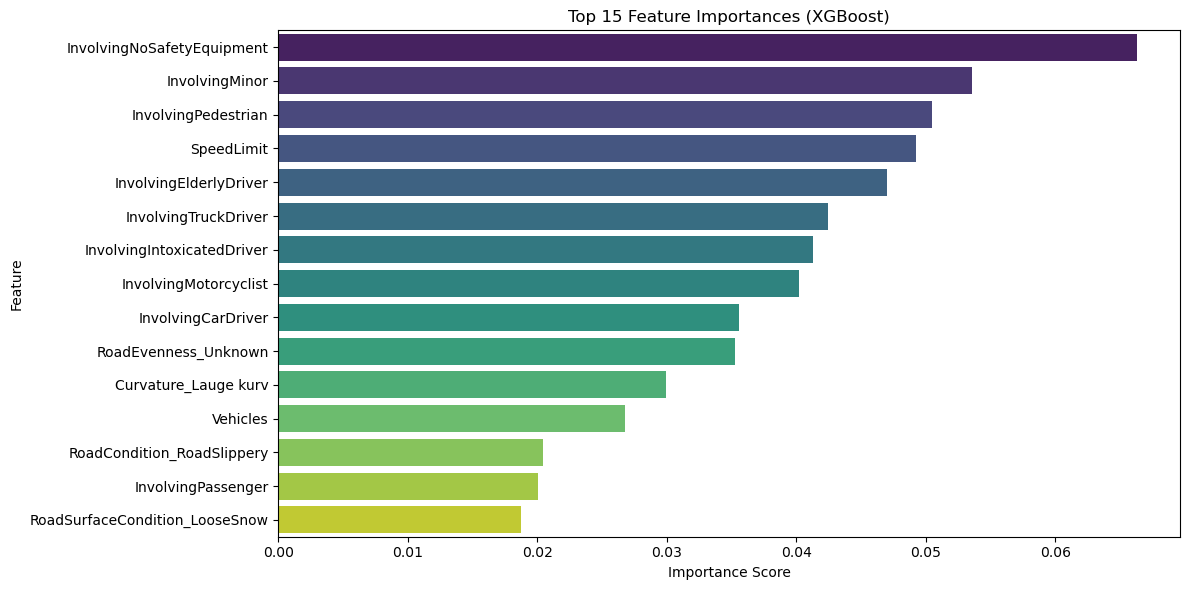

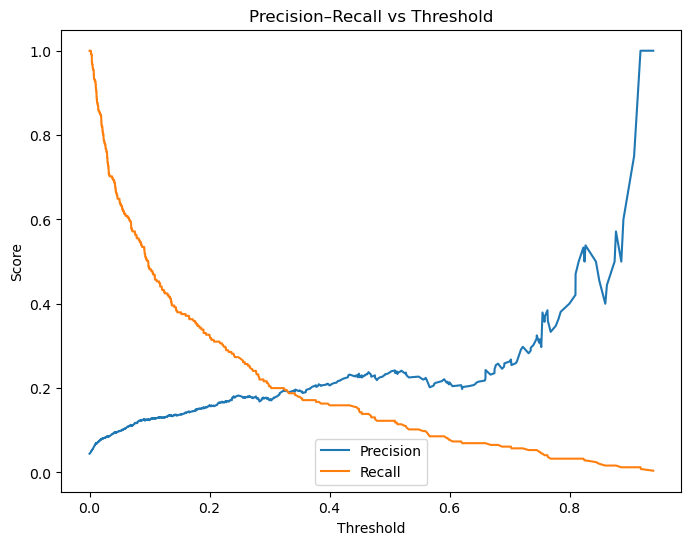

In [31]:
# 1. Impordid
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# 2. Target: Deadly
df_clean['Deadly'] = (df_clean['Fatalities'] >= 1).astype(int)

# 3. Feature selection
desired_features = [
    'Weekday','IsWeekend','Persons','Vehicles','SpeedLimit',
    'InvolvingIntoxicatedDriver','InvolvingPedestrian','InvolvingPassenger',
    'InvolvingElderlyDriver','InvolvingBusDriver','InvolvingTruckDriver',
    'InvolvingPublicTransportDriver','InvolvingCarDriver','InvolvingMotorcyclist',
    'InvolvingCyclist','InvolvingMinor','InvolvingNoSafetyEquipment',
    'Curvature','RoadEvenness','RoadCondition','RoadSurface',
    'RoadSurfaceCondition','NumberOfLanes','Weather','Lighting','Deadly'
]
selected_features = [c for c in desired_features if c in df_clean.columns]
df_dt = df_clean[selected_features].dropna()

# 4. Encode categoricals
categorical_cols = df_dt.select_dtypes(include='object').columns.tolist()
df_dt = pd.get_dummies(df_dt, columns=categorical_cols, drop_first=True)

# 5. Train/test split
X = df_dt.drop('Deadly', axis=1)
y = df_dt['Deadly']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. SMOTE (tasakaalustamine)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# 7. XGBoost (parem väikese klassi tabamisel)
scale_pos_weight = len(y_resampled[y_resampled==0]) / len(y_resampled[y_resampled==1])
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_resampled, y_resampled)

# 8. Evaluate (default threshold 0.5)
y_pred = xgb.predict(X_test)
print("Default threshold (0.5):")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 9. Threshold tuning (näiteks 0.35)
y_proba = xgb.predict_proba(X_test)[:,1]
y_pred_thresh = (y_proba >= 0.35).astype(int)

print("\nCustom threshold (0.35):")
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

# 10. Feature importance
importances = pd.Series(xgb.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_features.values, y=top_features.index, hue=top_features.index, palette='viridis', legend=False)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

from sklearn.metrics import precision_recall_curve

y_proba = xgb.predict_proba(X_test)[:,1]
prec, rec, thresh = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision–Recall vs Threshold")
plt.legend()
plt.show()
